**Importing Libraries**

In [92]:
!pip install sweetviz
import sweetviz as sv

In [93]:
import pandas as pd
import numpy as np
import math
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d


% matplotlib inline


**Importing Data**

In [94]:
# Read csv
data = pd.read_csv("https://raw.githubusercontent.com/Vinsocf/emotions/main/Wisconsin-bc-data.csv")
data.head()

id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

**EDA Using Sweetwiz**

                                             |          | [  0%]   00:00 -> (? left)


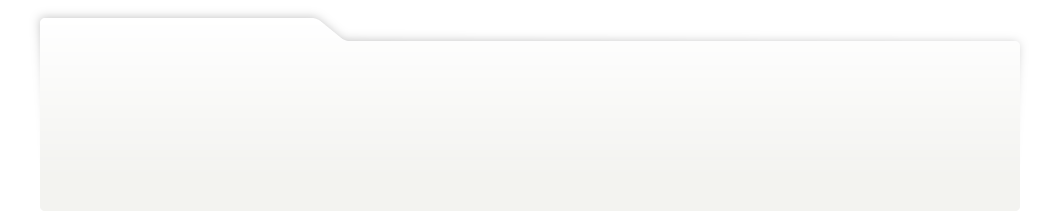
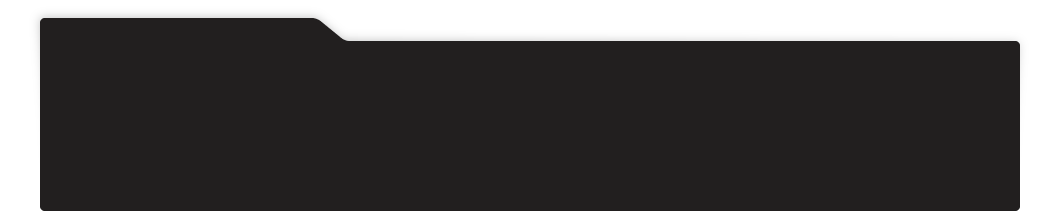
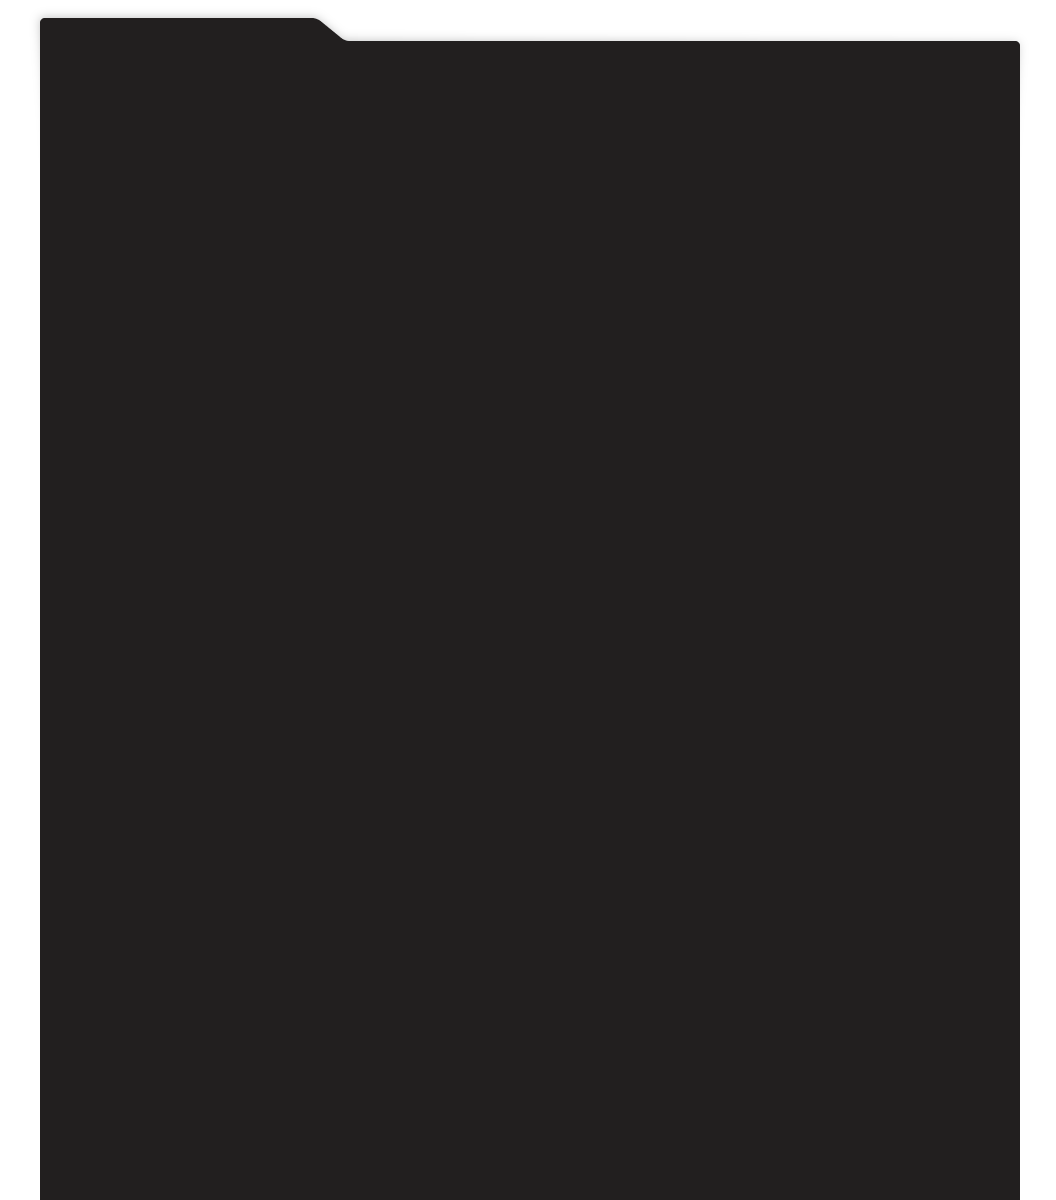
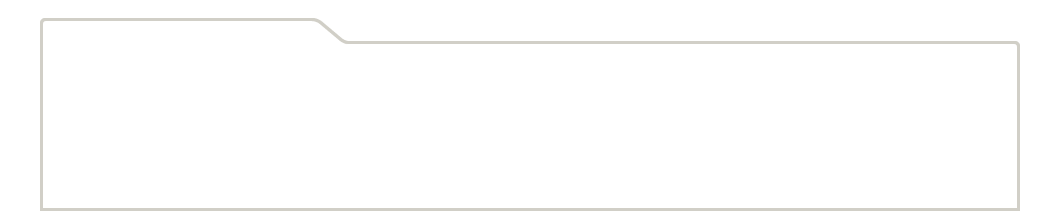
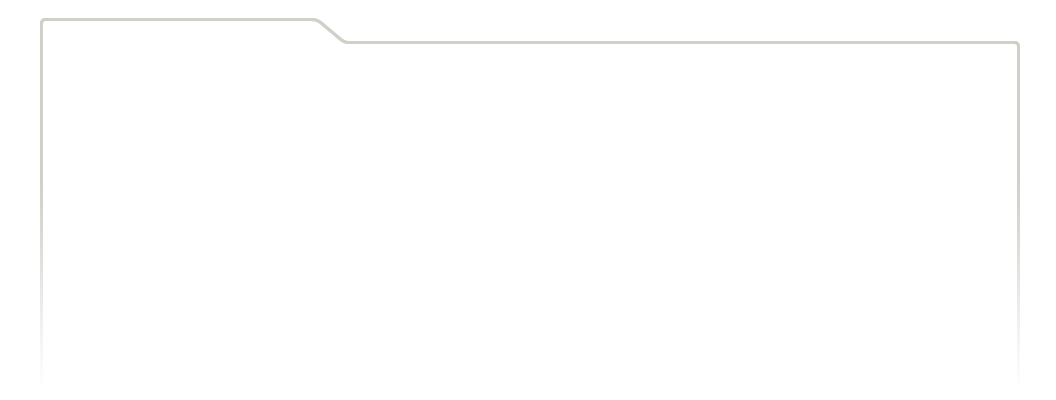
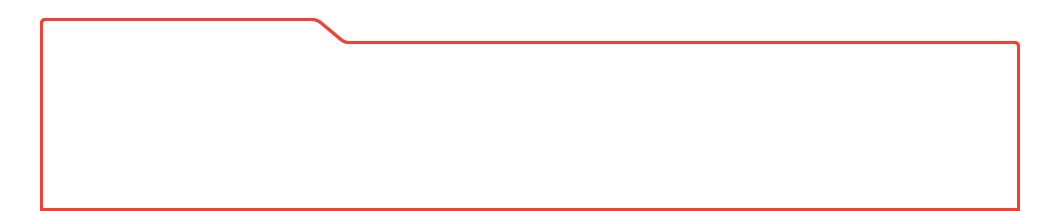
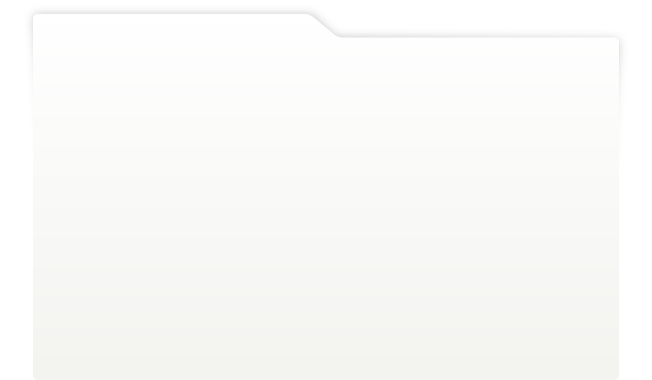
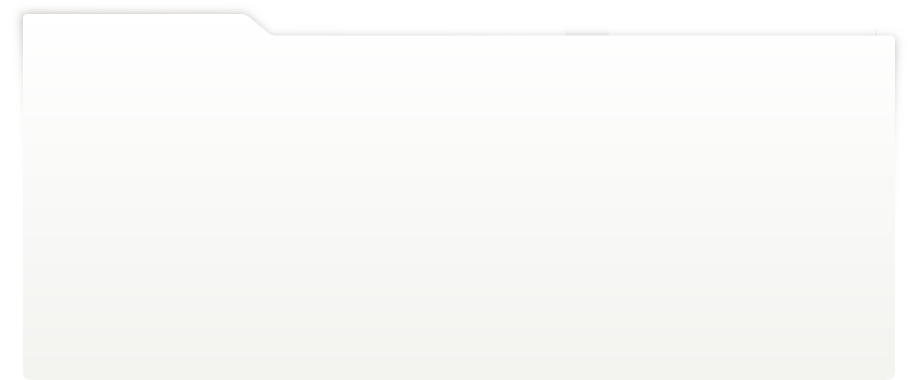
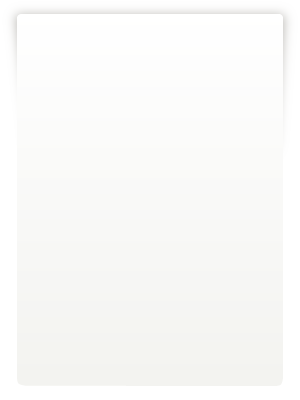
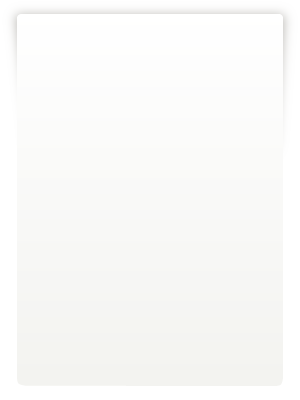
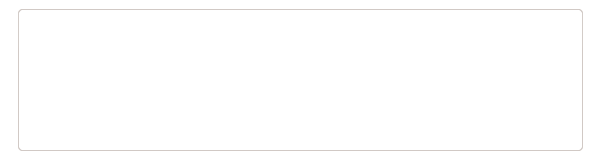
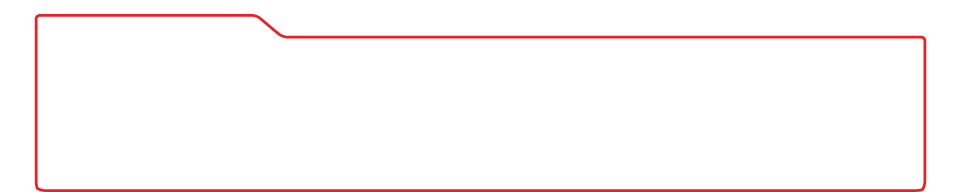
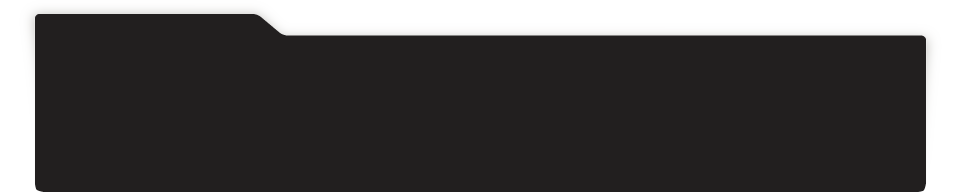
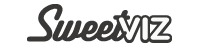
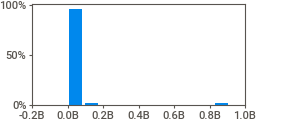
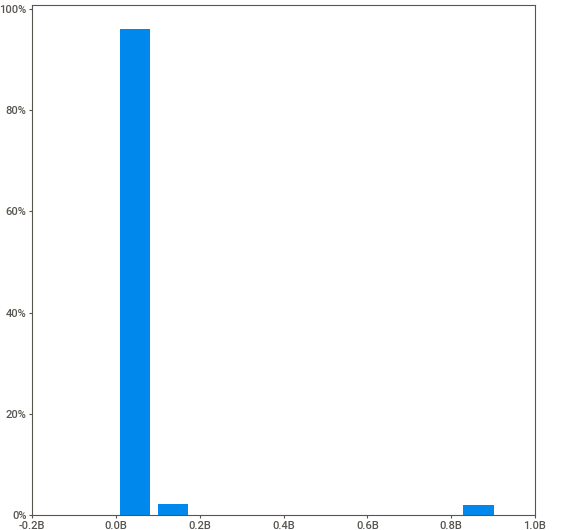
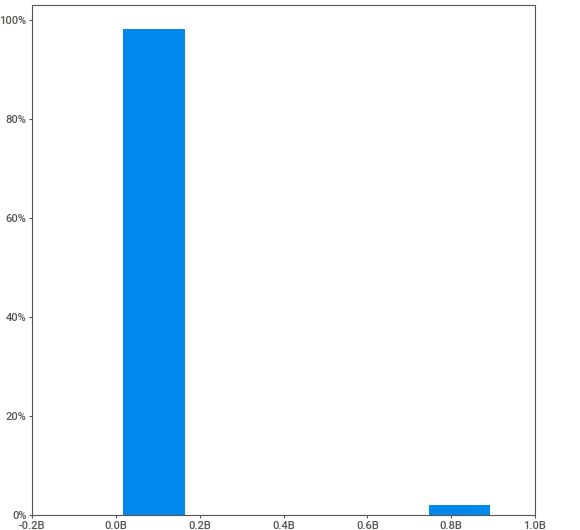
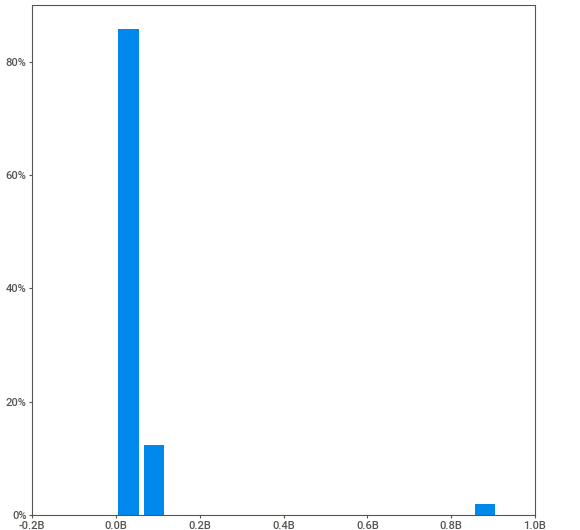
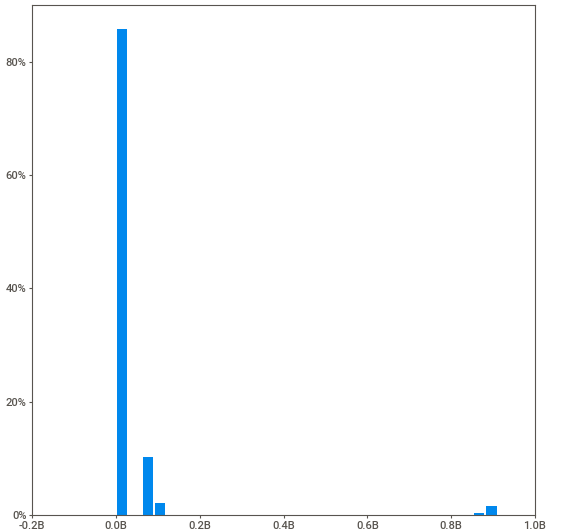
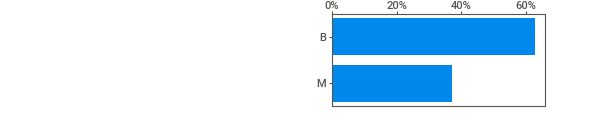
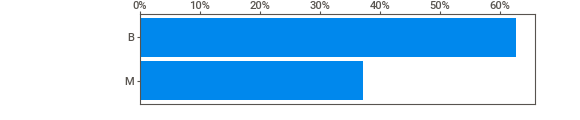
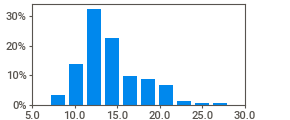
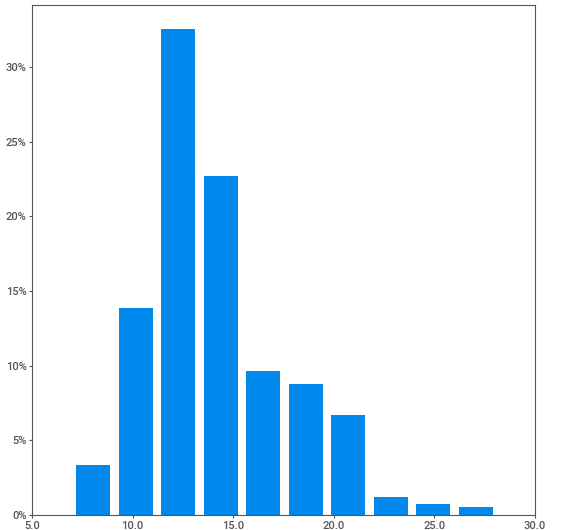
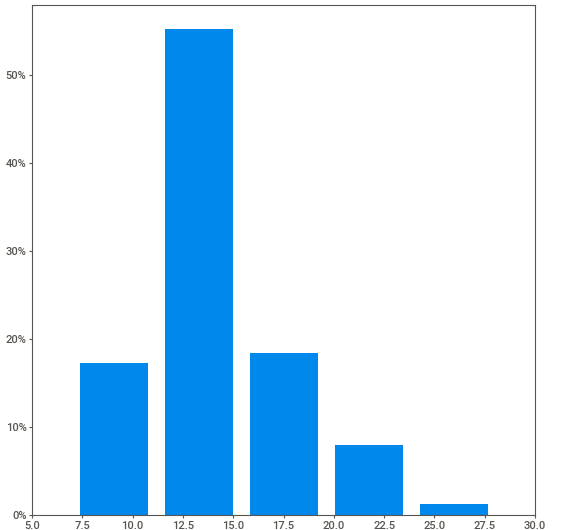
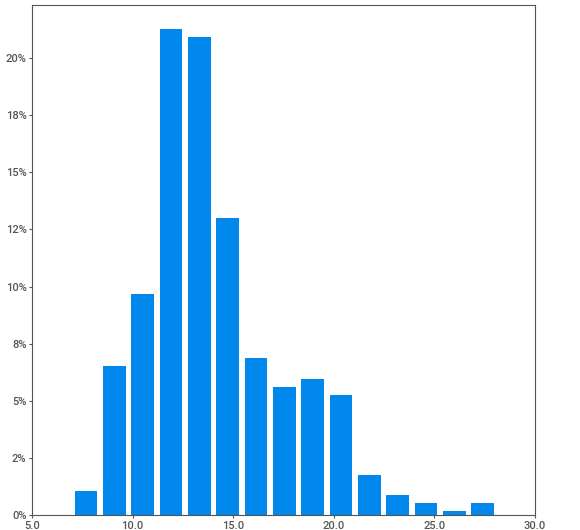
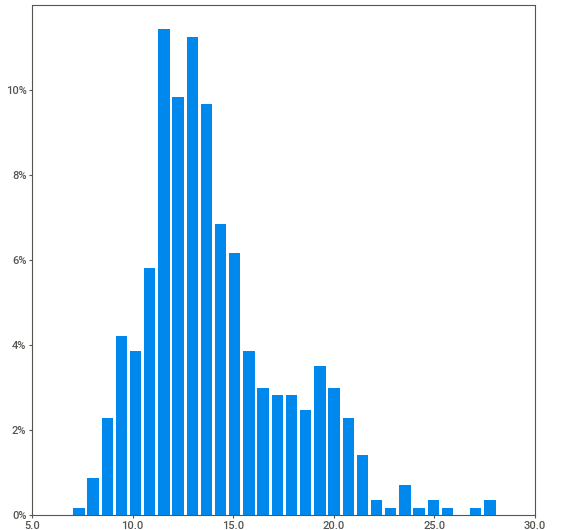
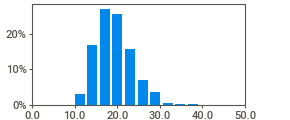
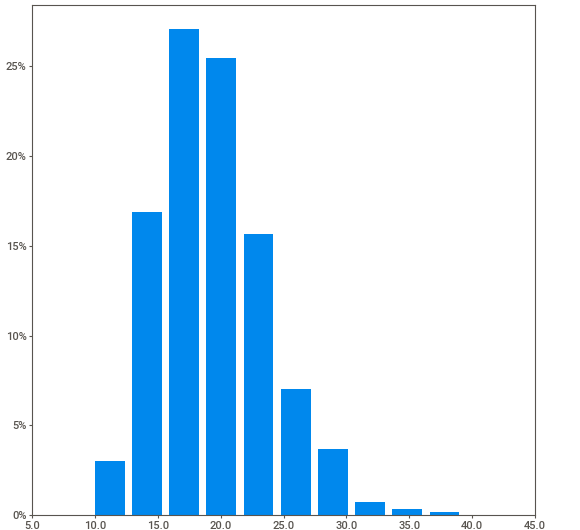
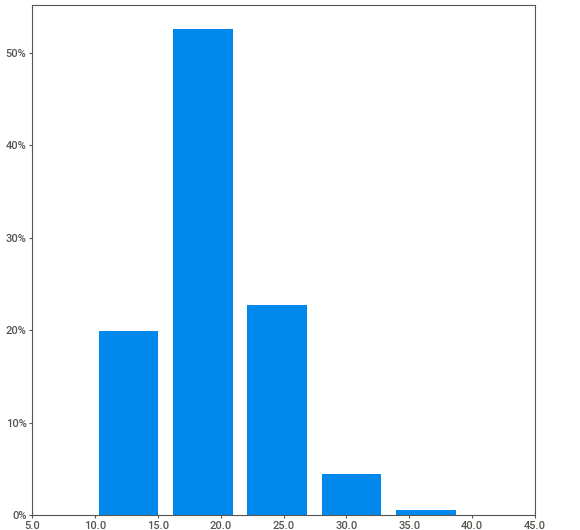
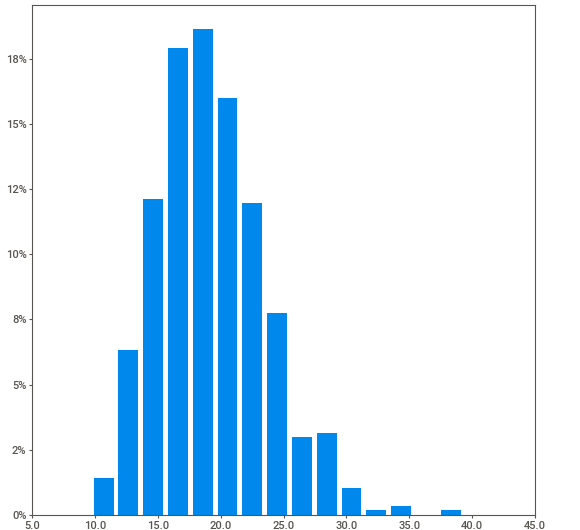
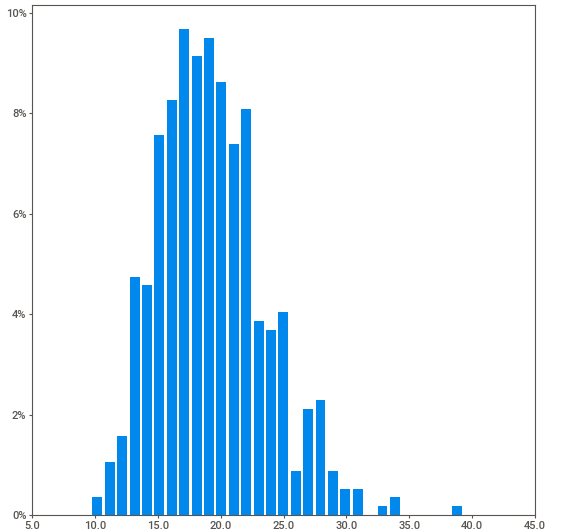
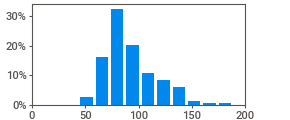
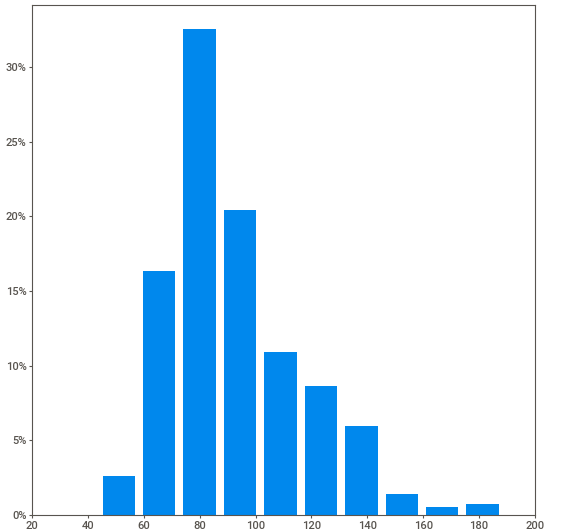
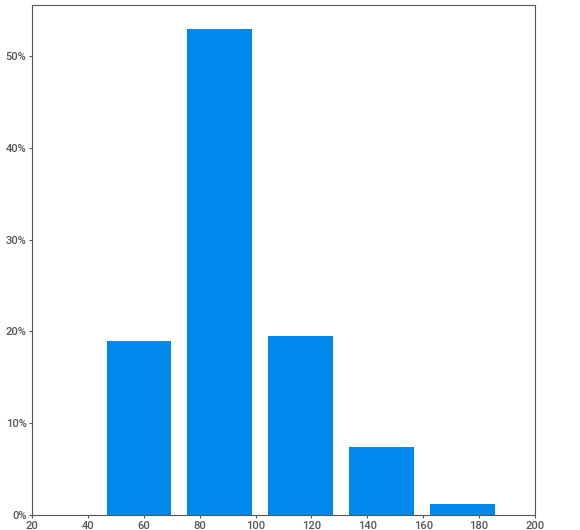
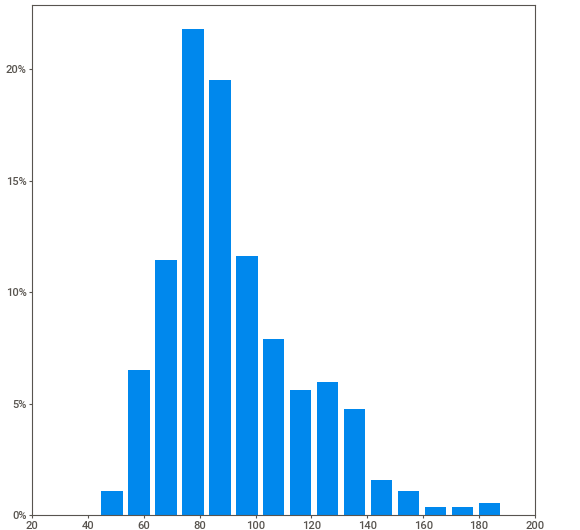
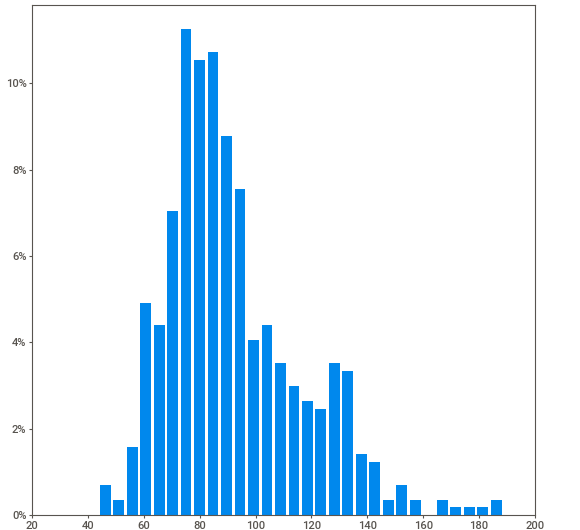
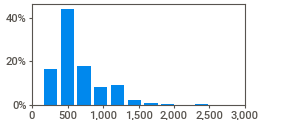
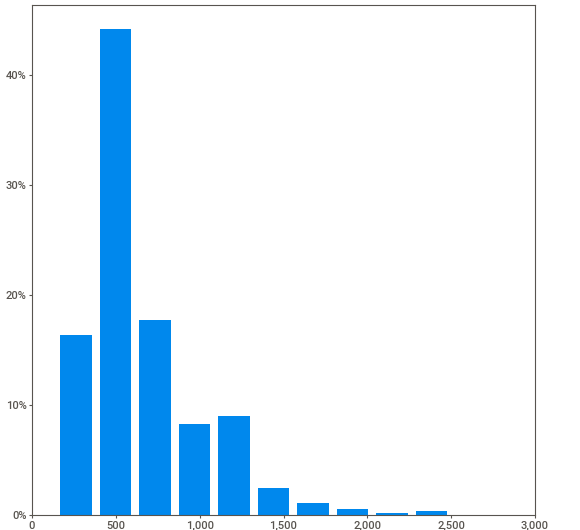
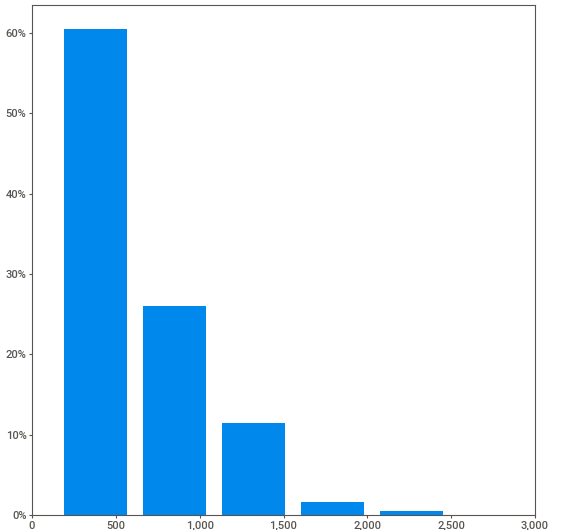
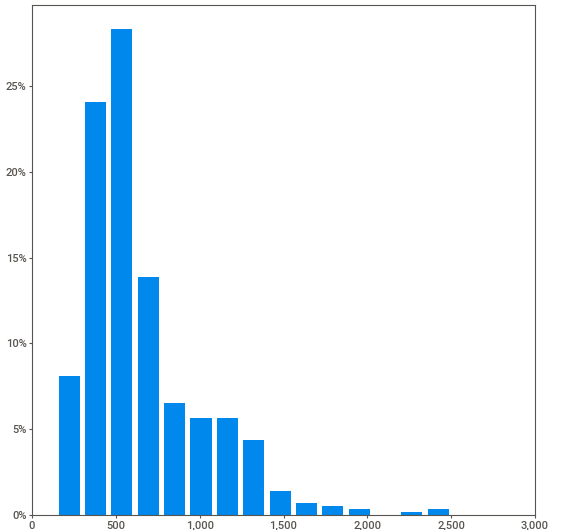
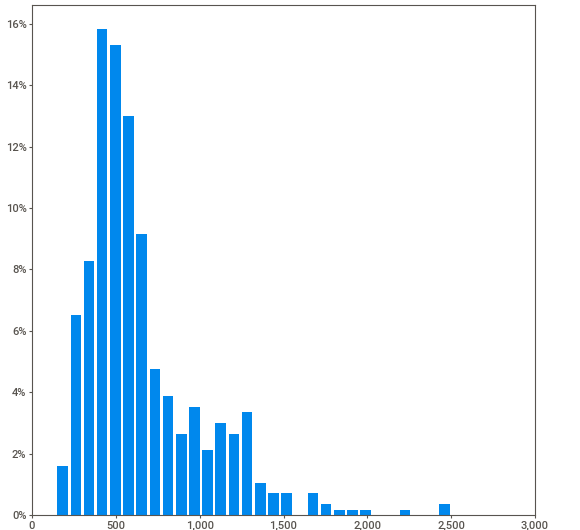
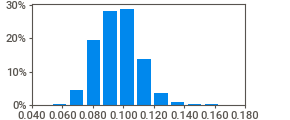
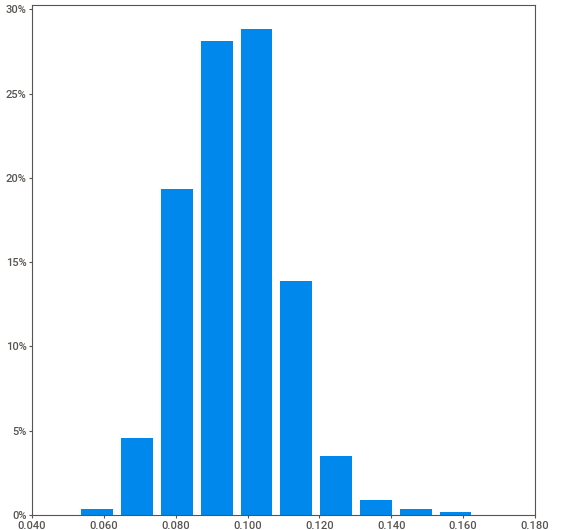
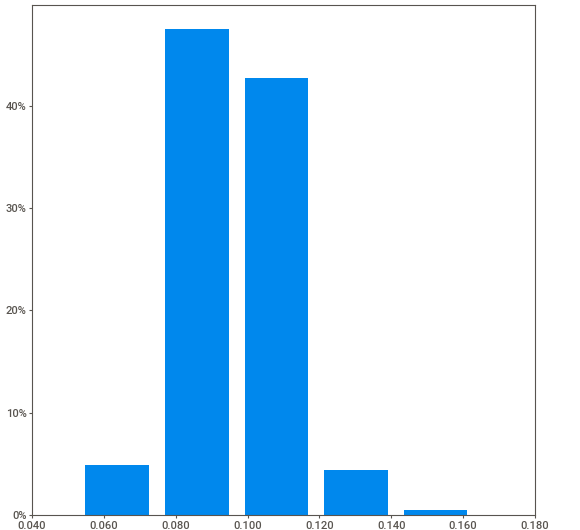
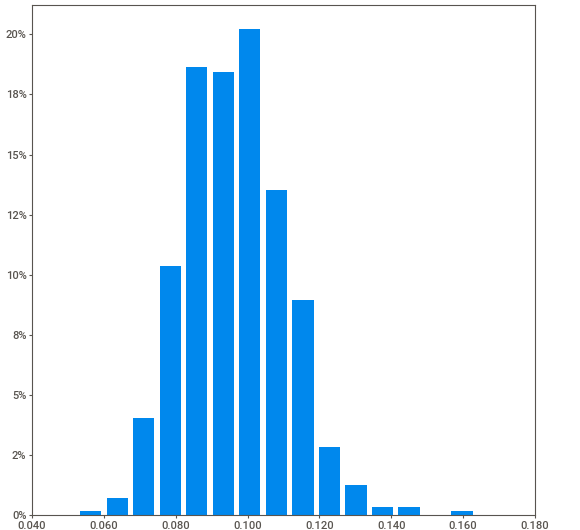
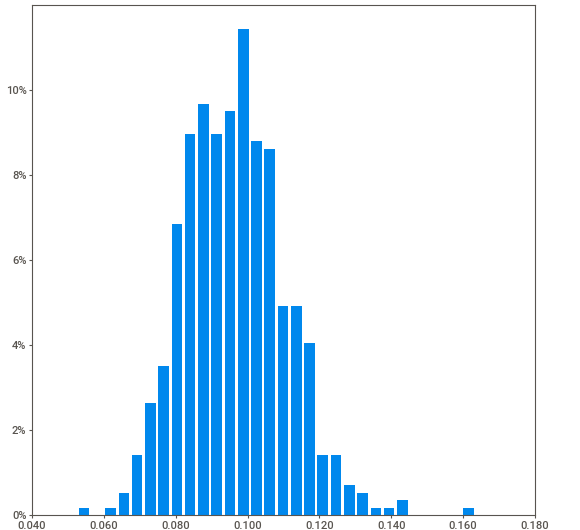
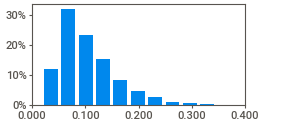
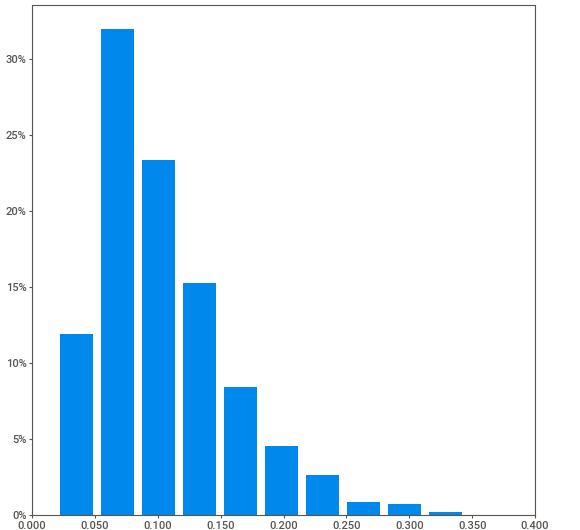
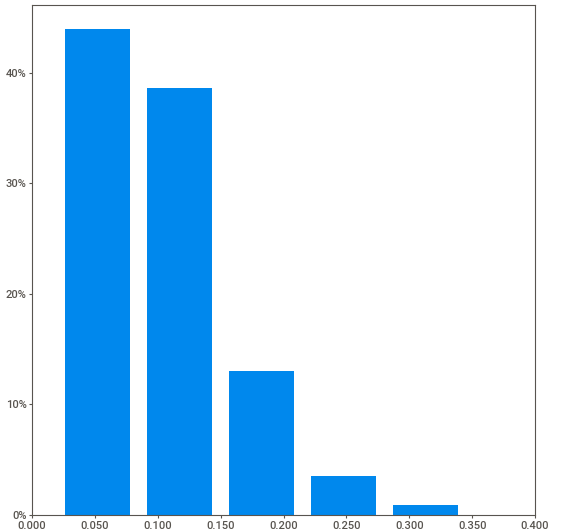
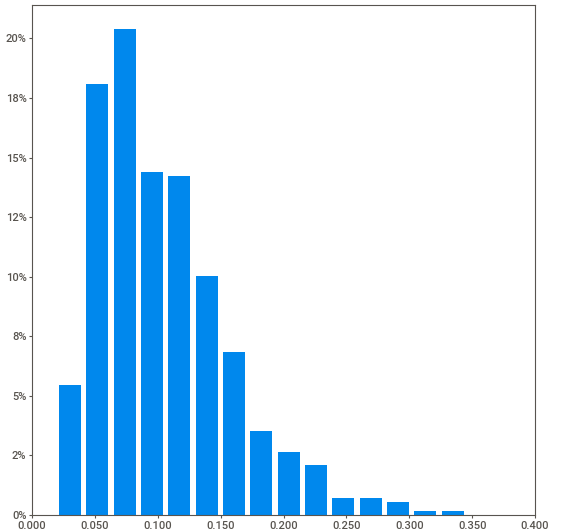
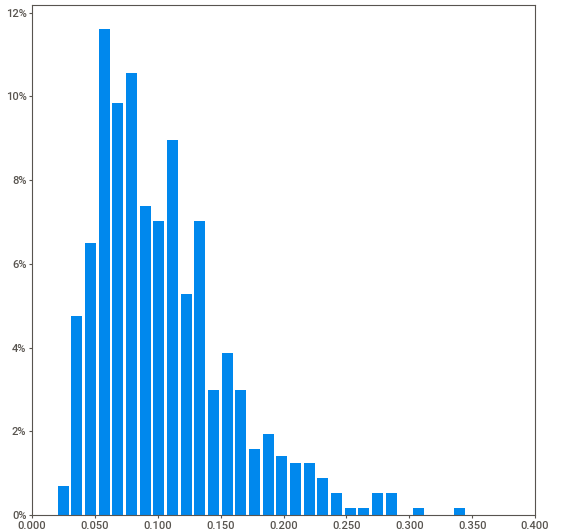
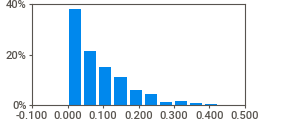
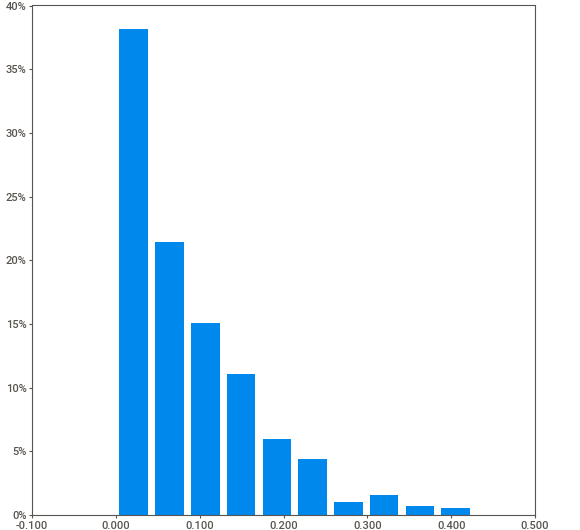
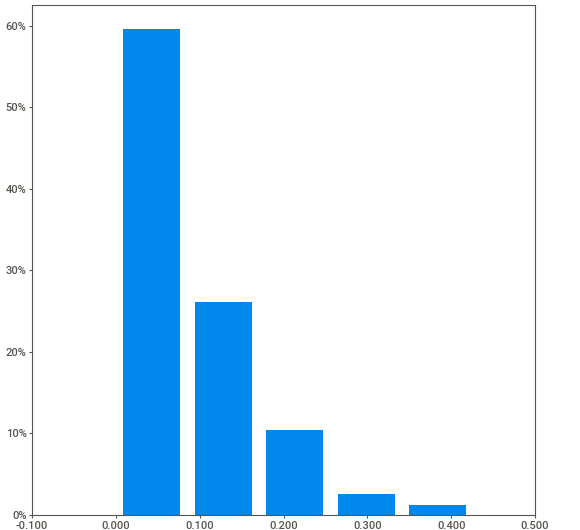
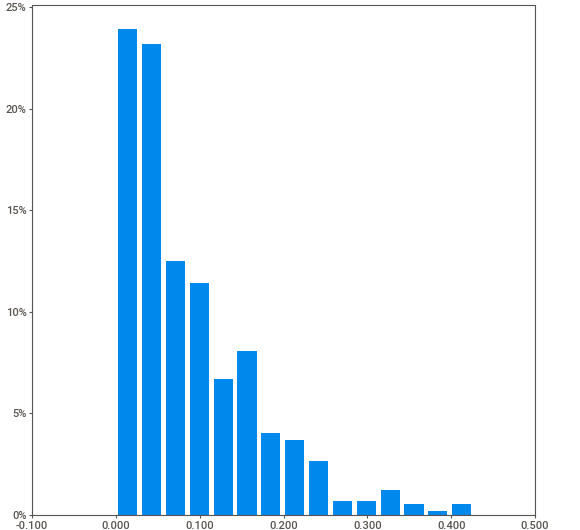
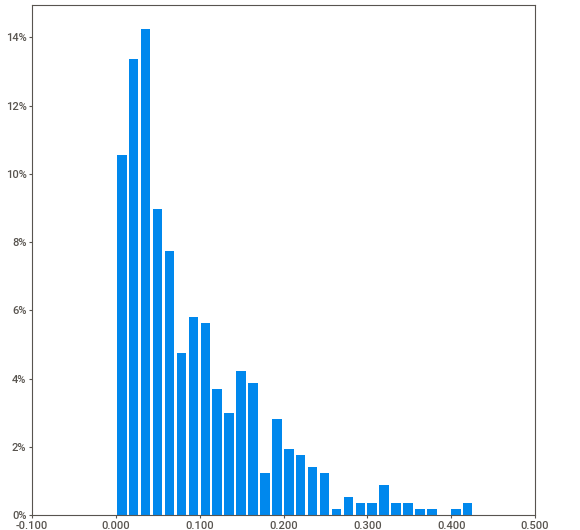
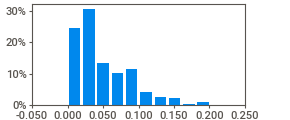
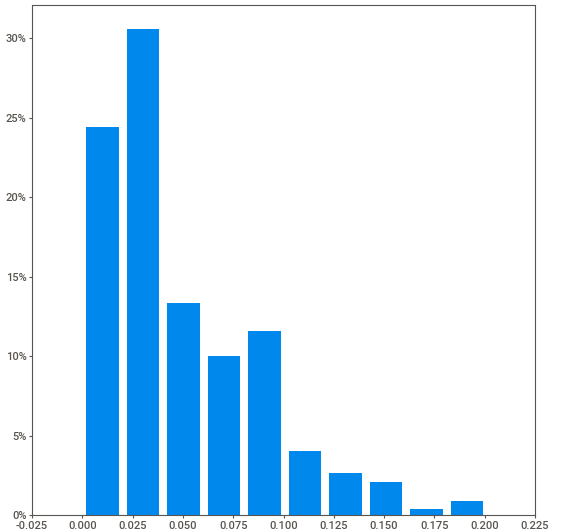
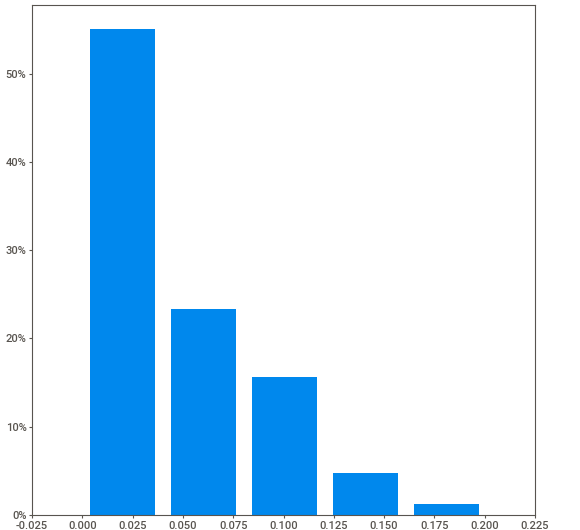
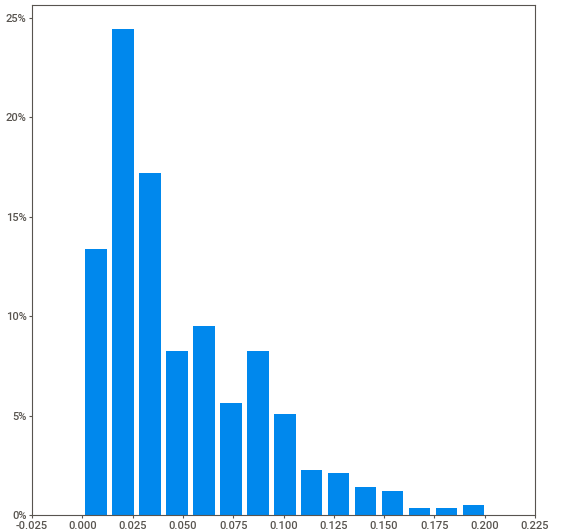
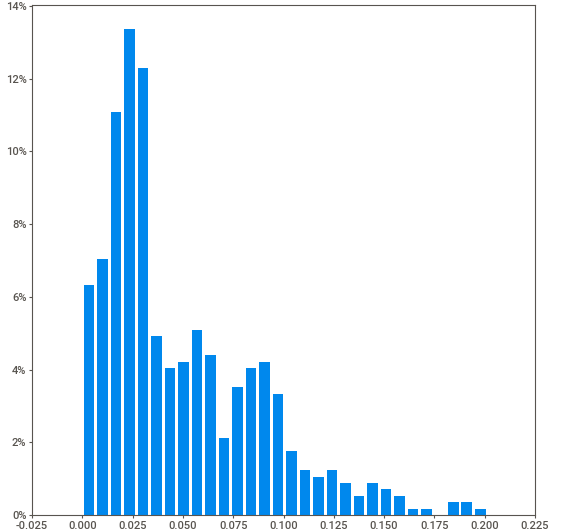
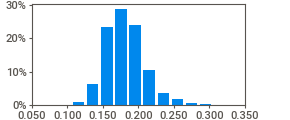
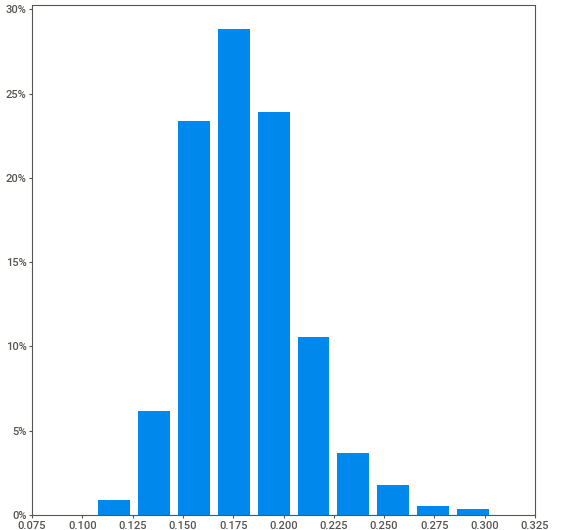
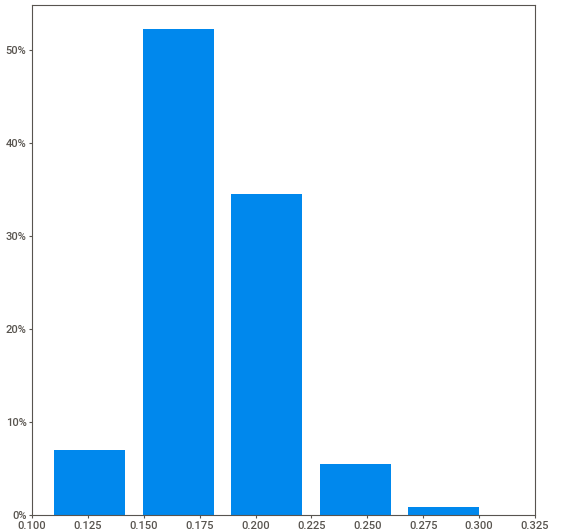
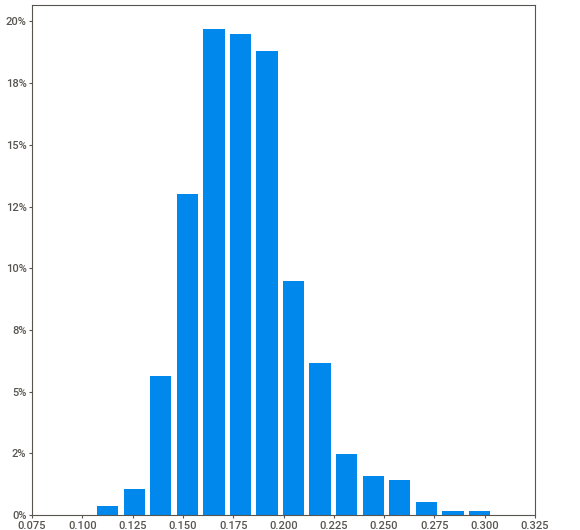
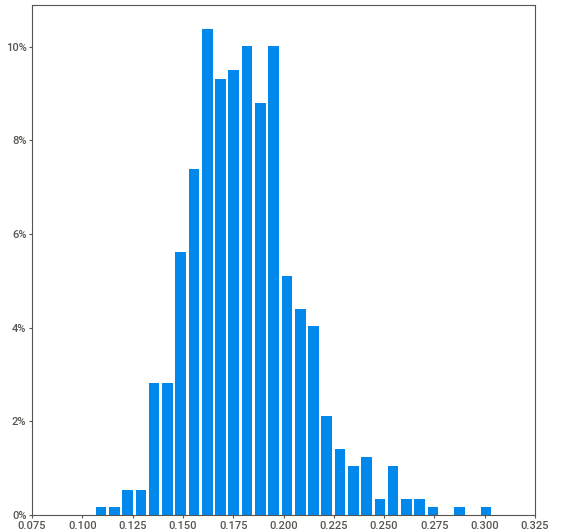
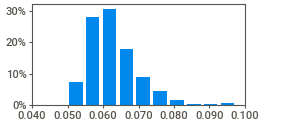
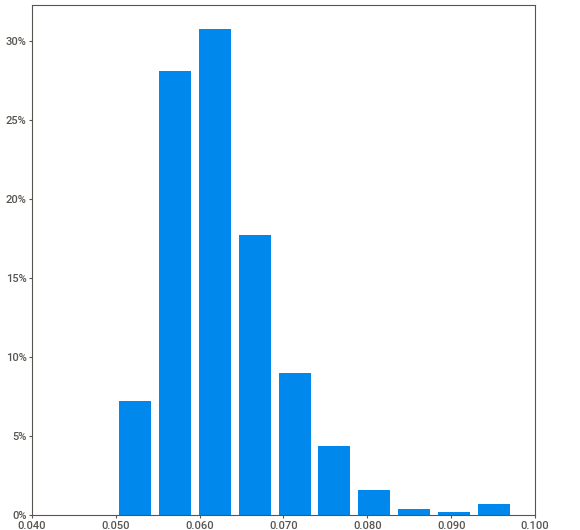
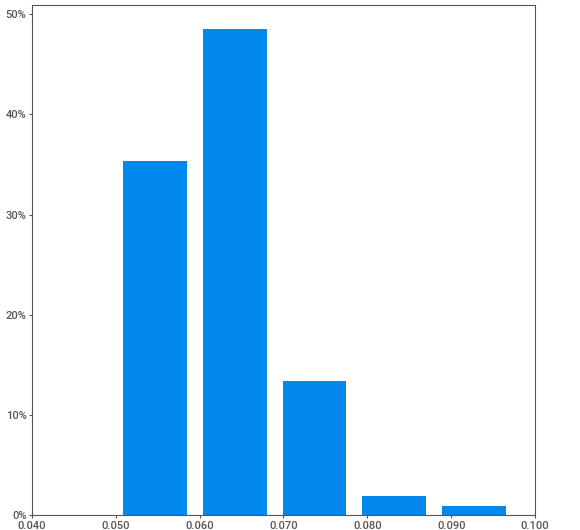
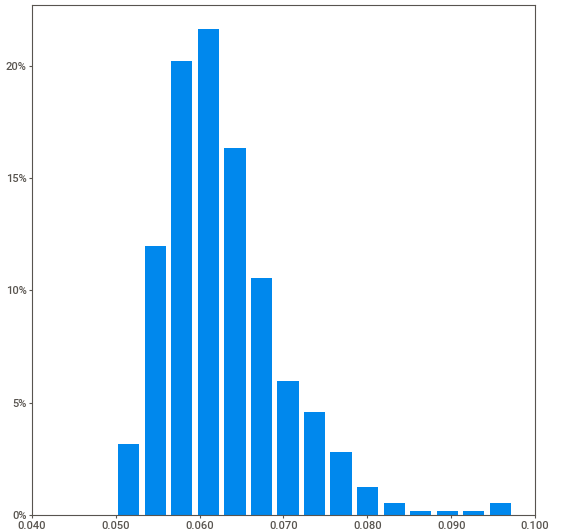
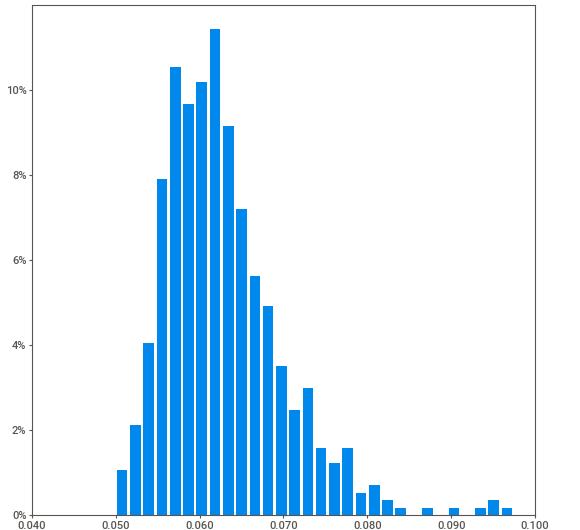
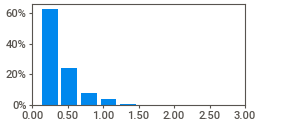
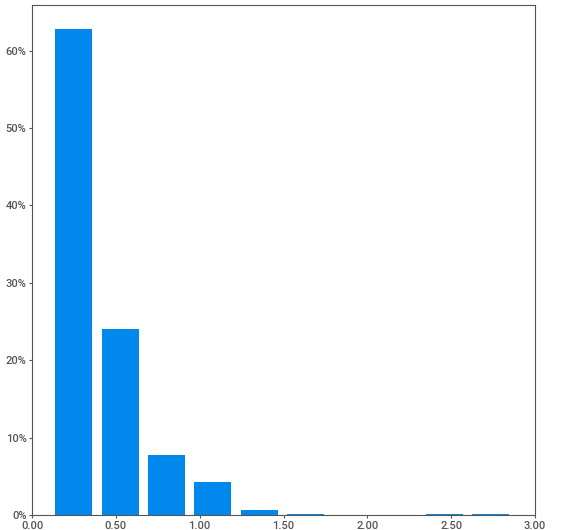
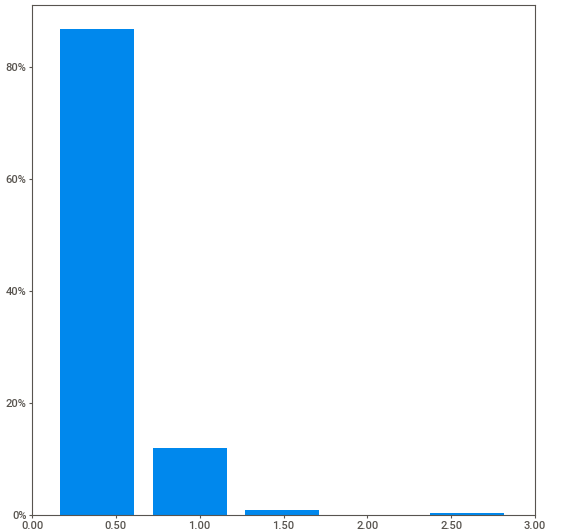
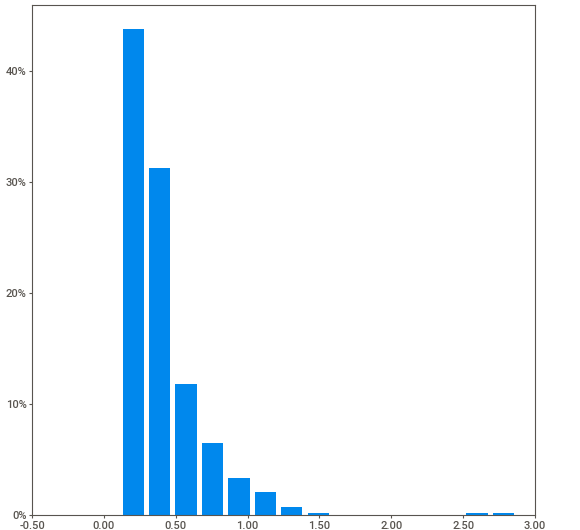
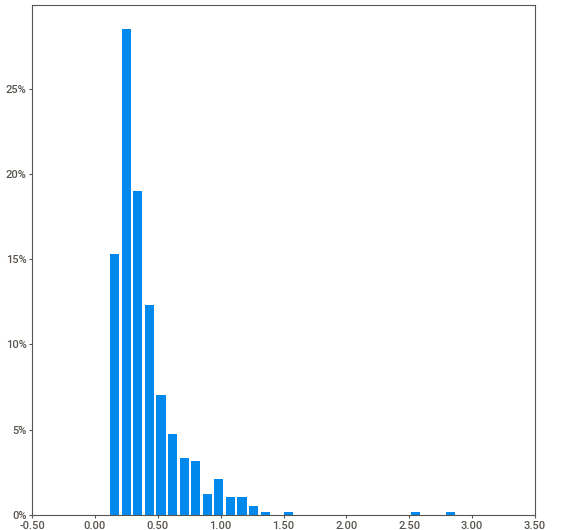
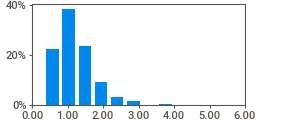
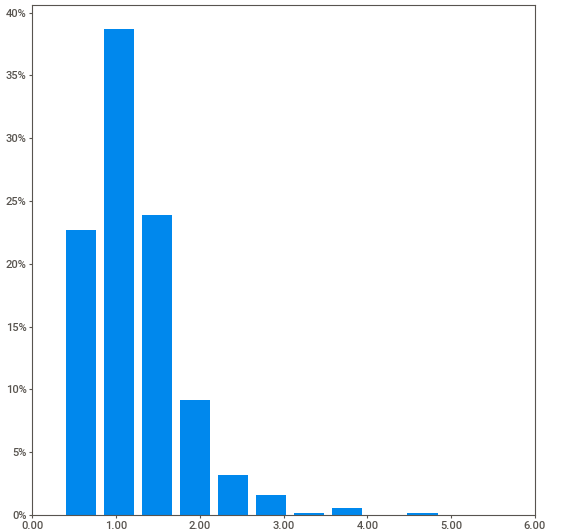
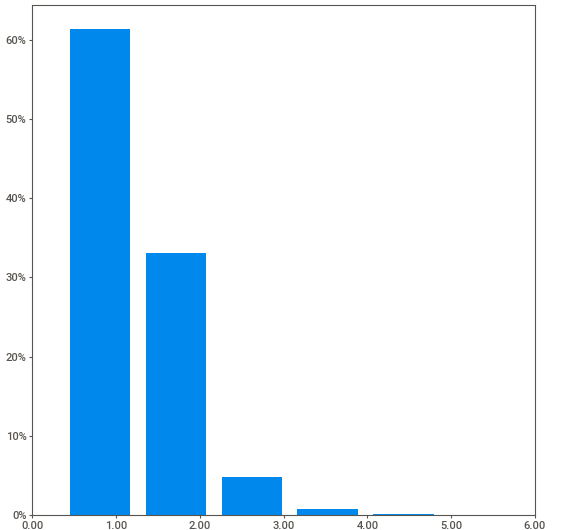
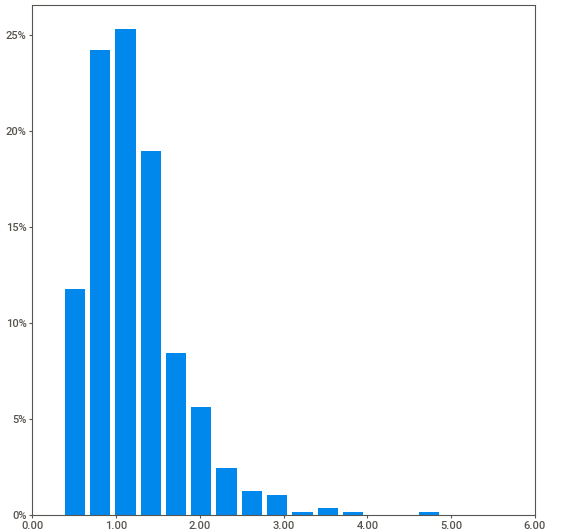
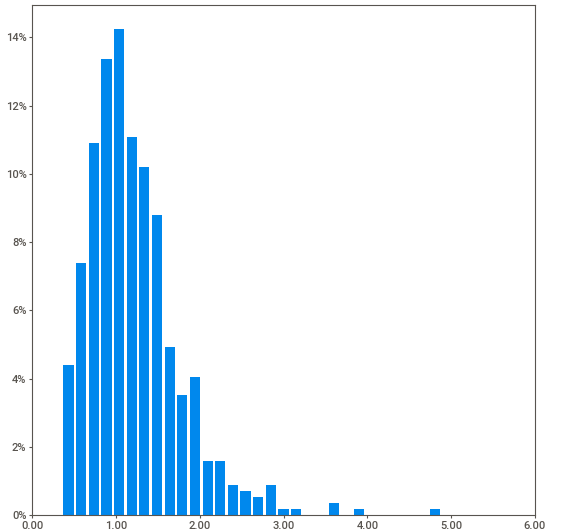
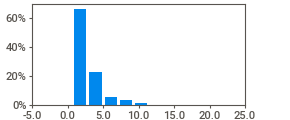
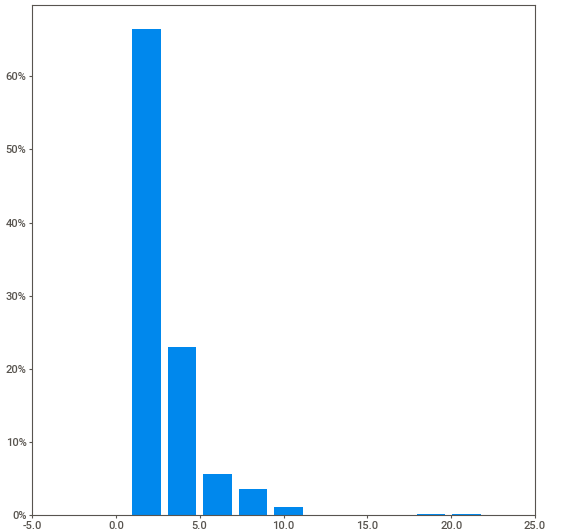
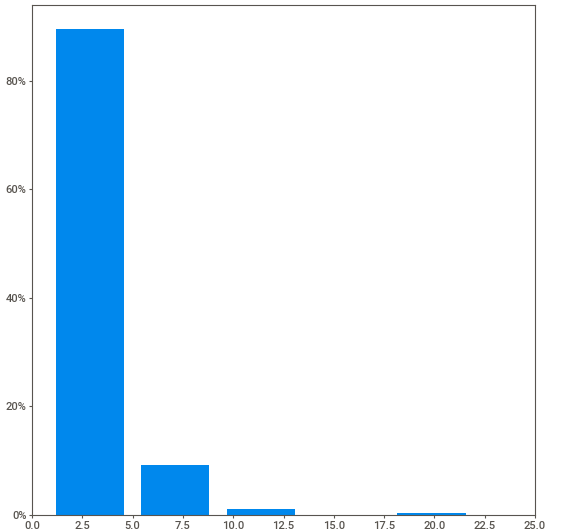
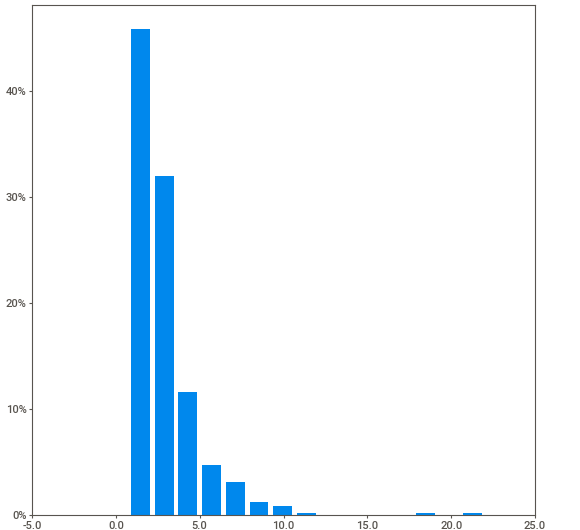
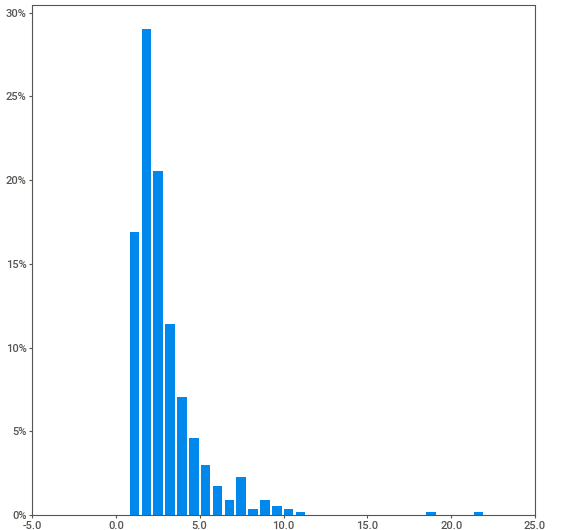
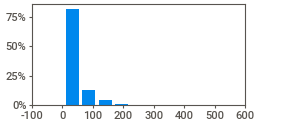
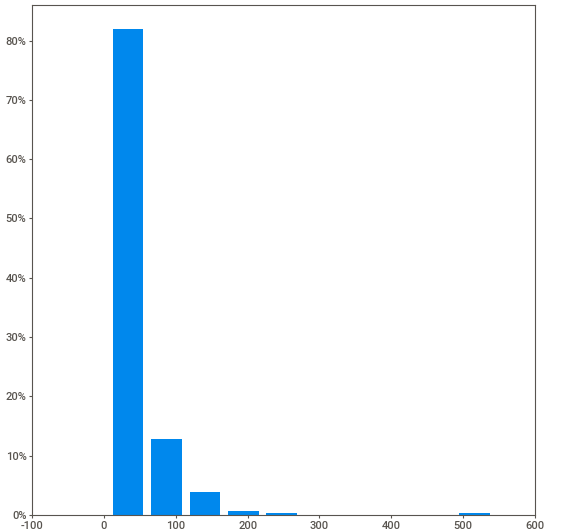
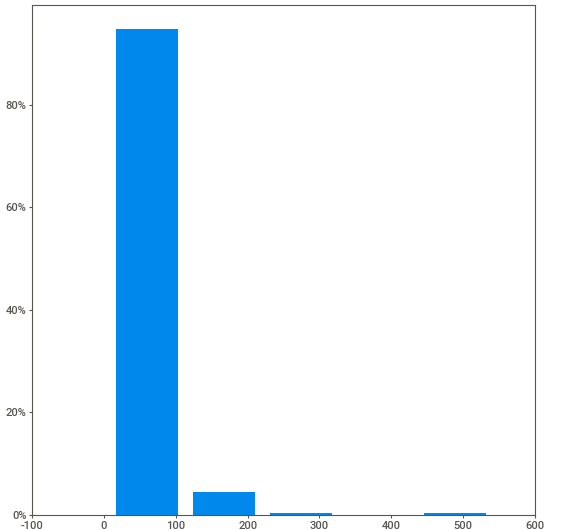
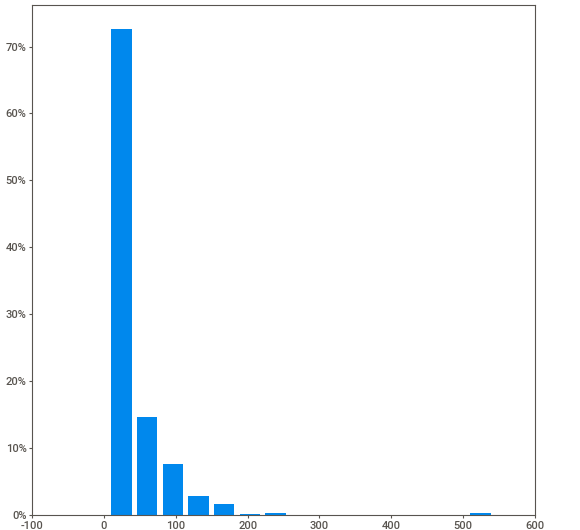
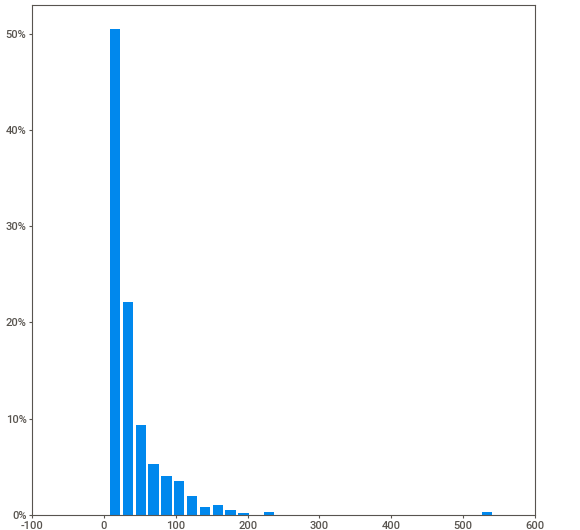
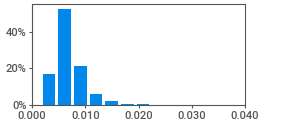
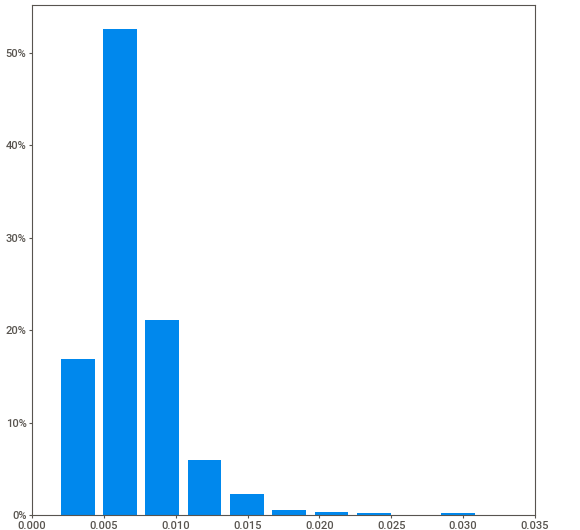
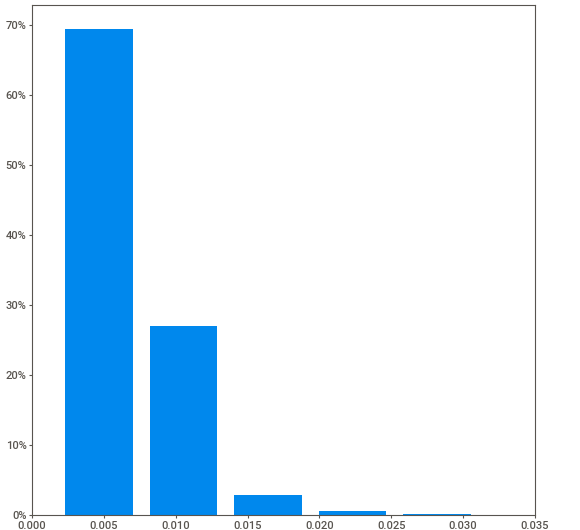
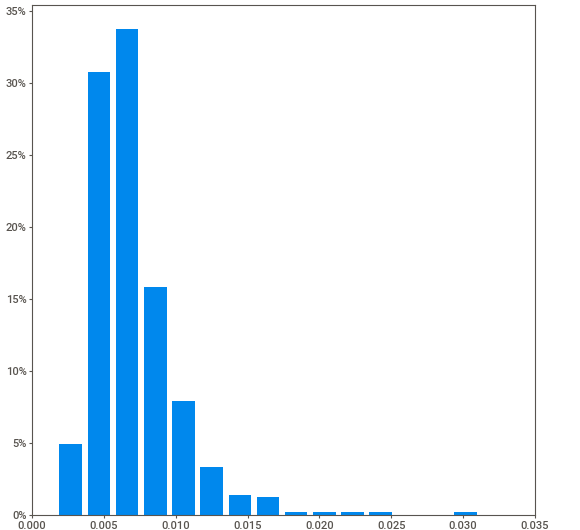
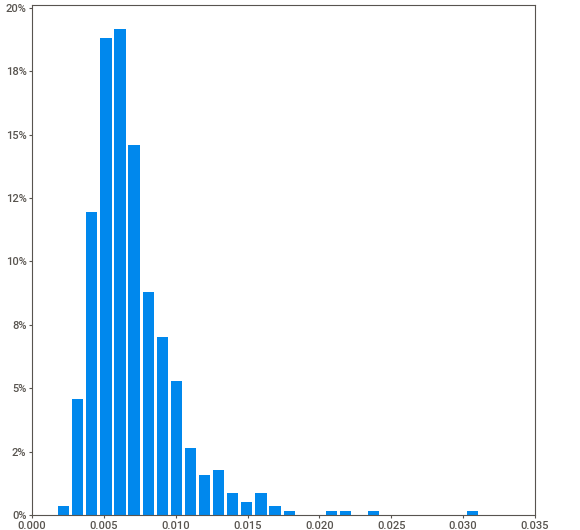
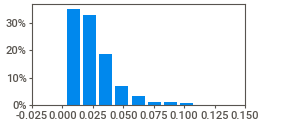
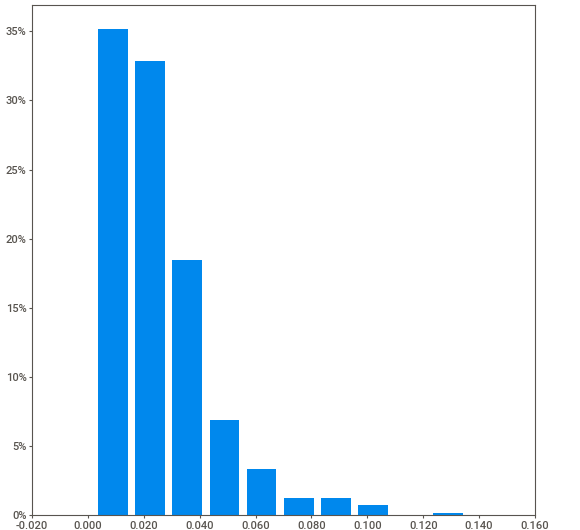
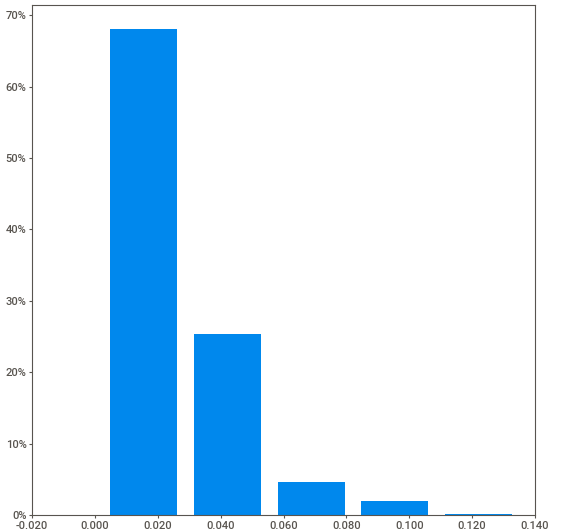
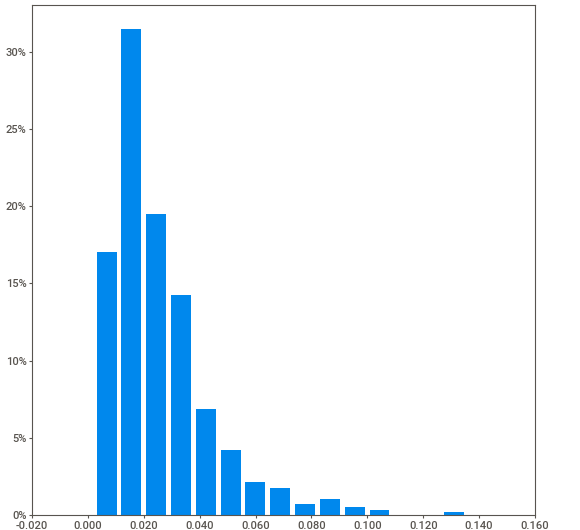
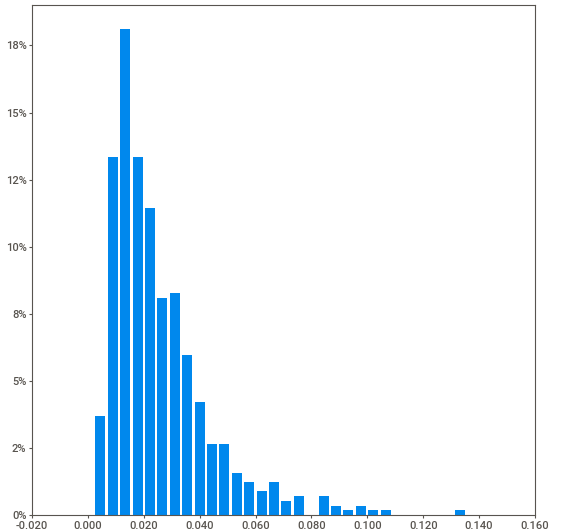
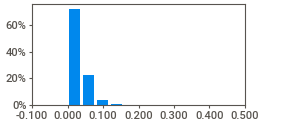
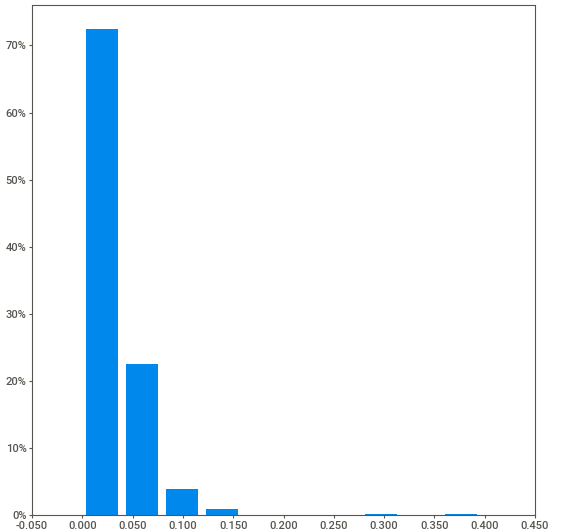
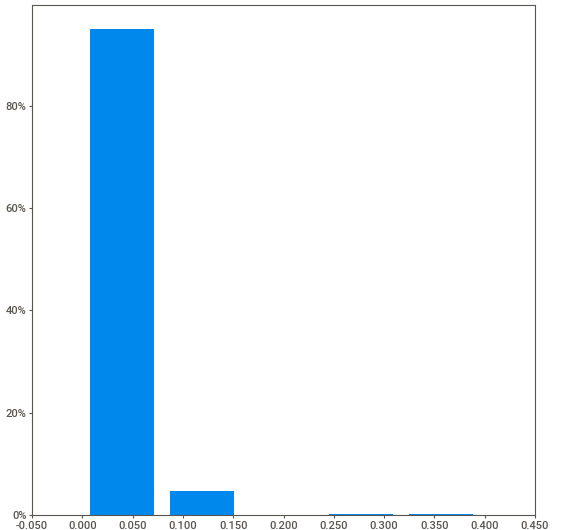
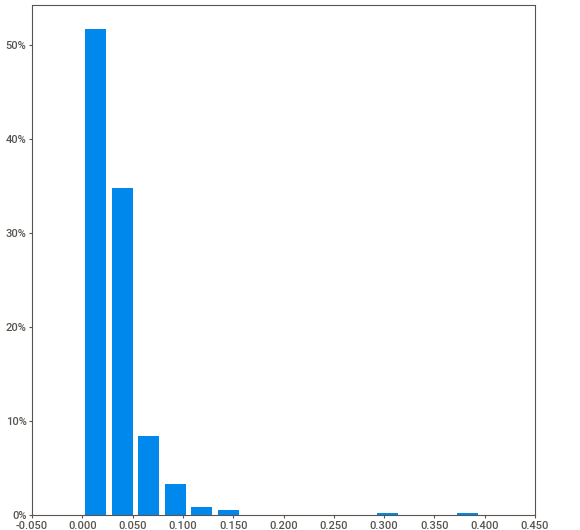
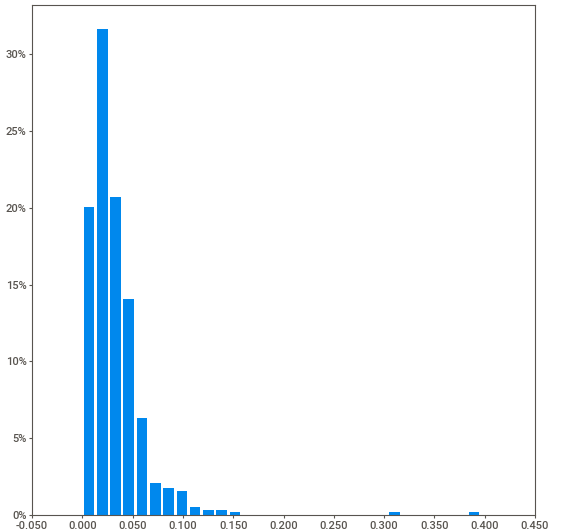
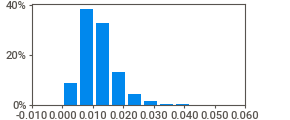
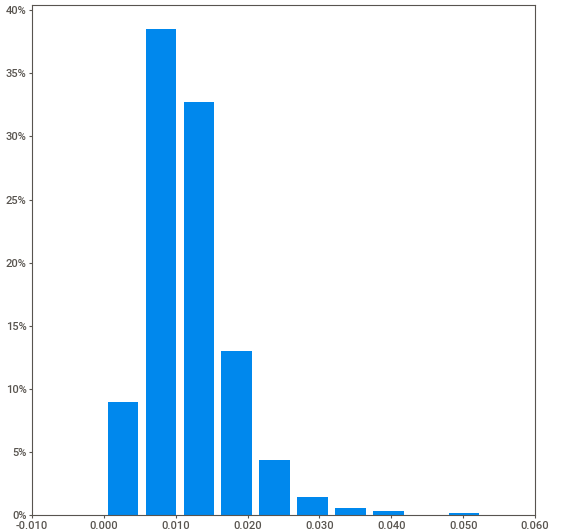
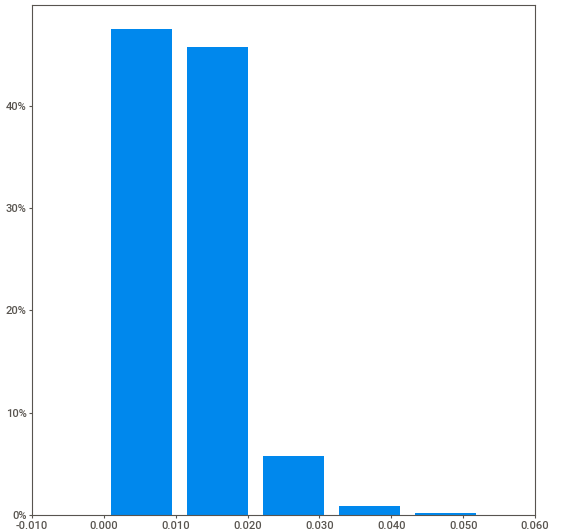
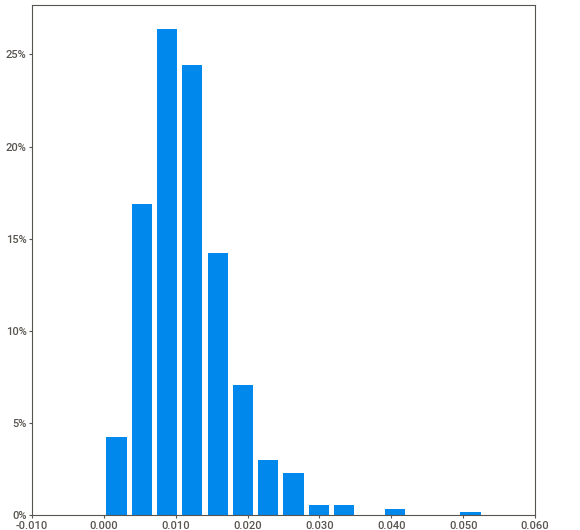
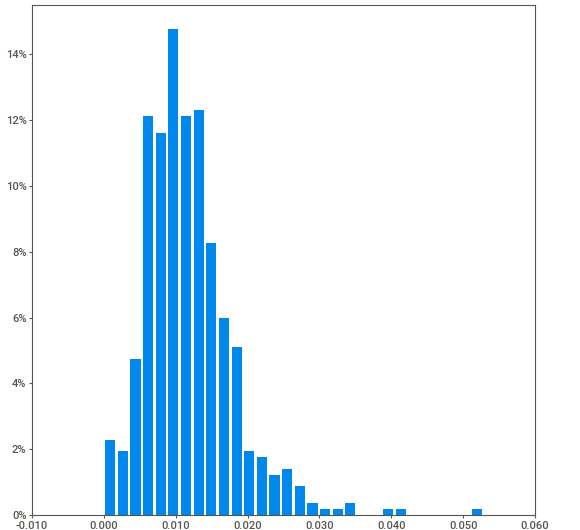
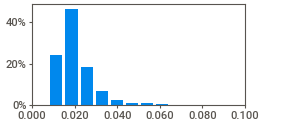
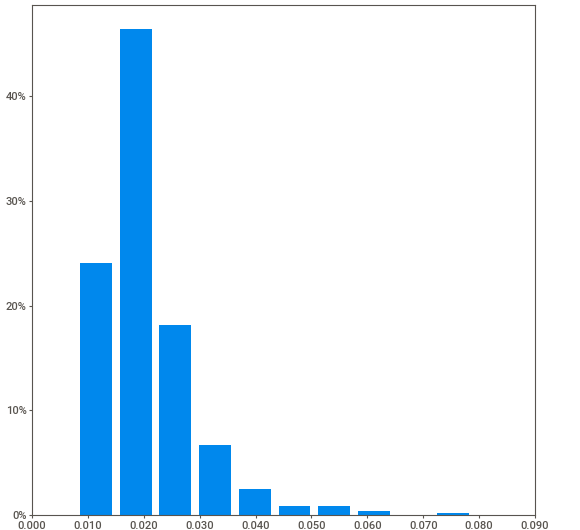
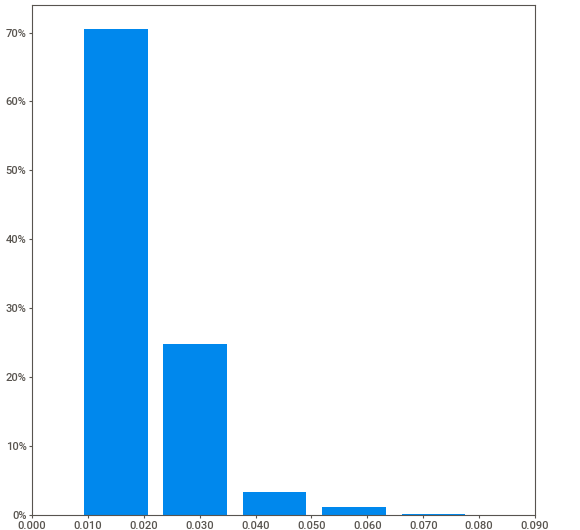
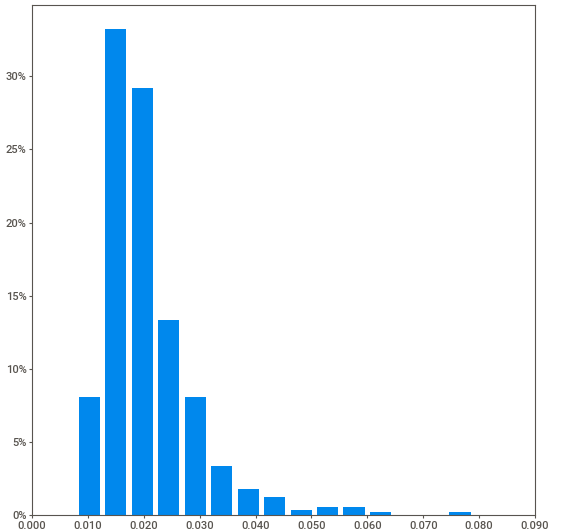
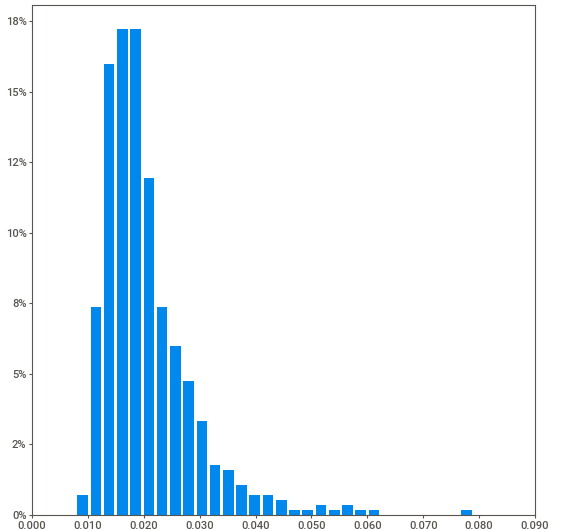
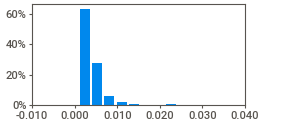
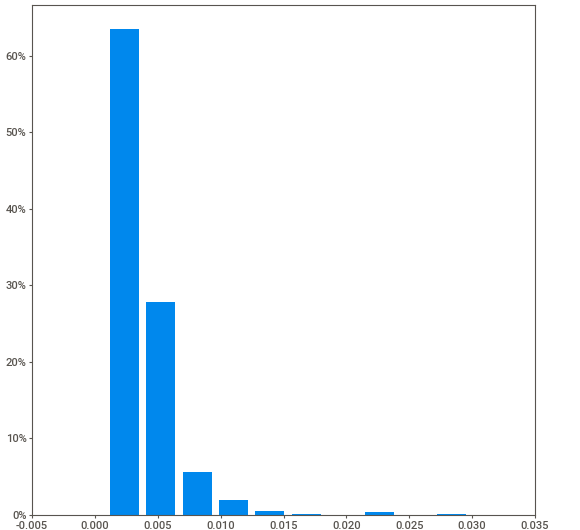
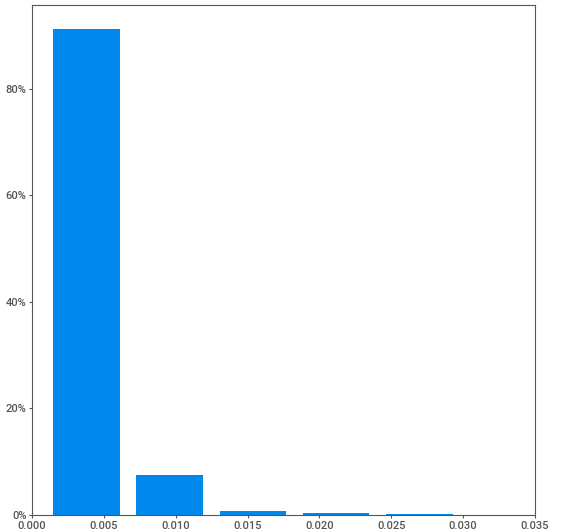
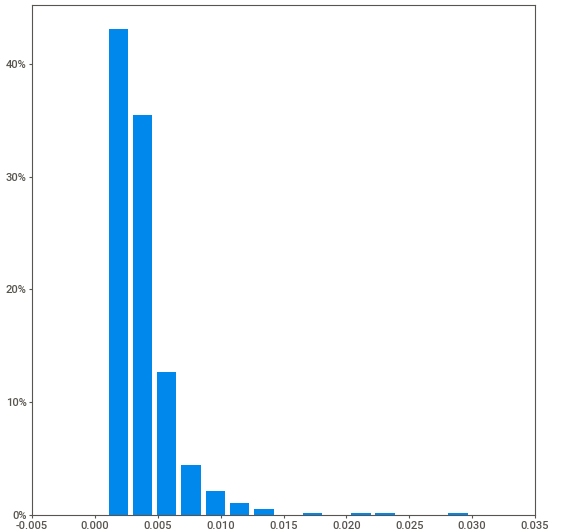
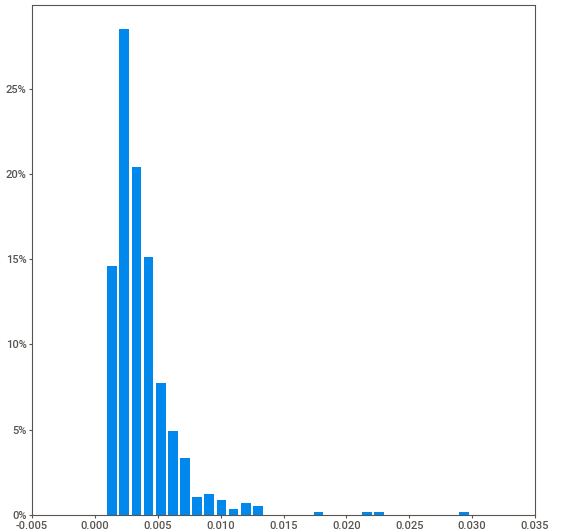
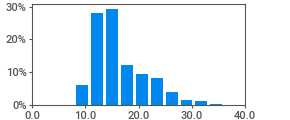
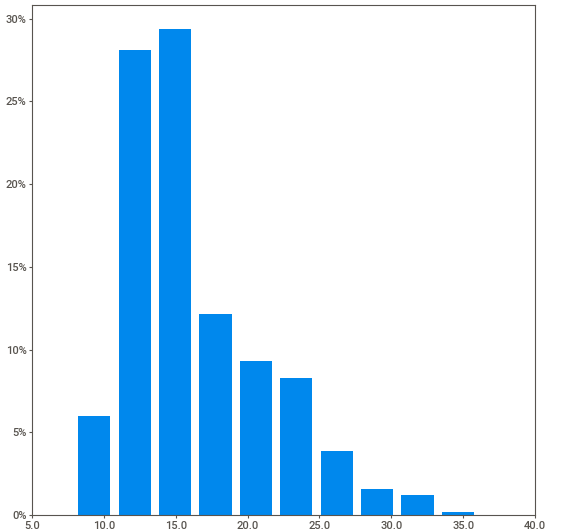
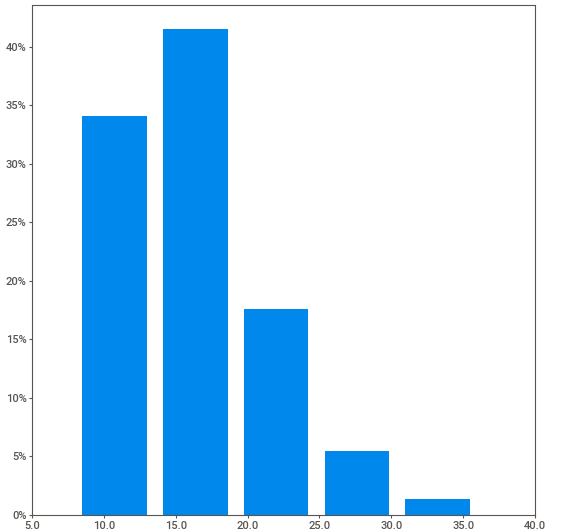
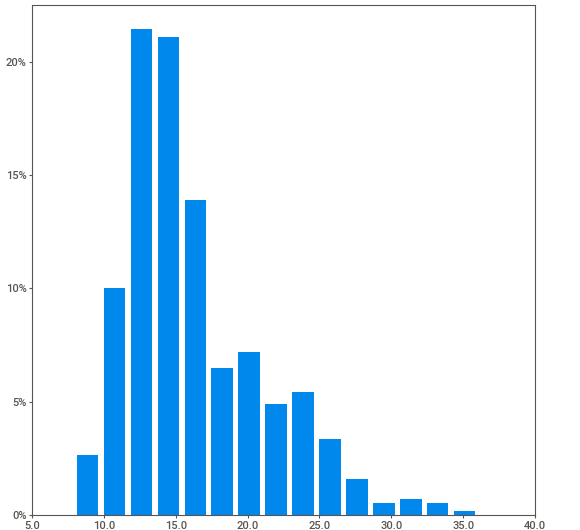
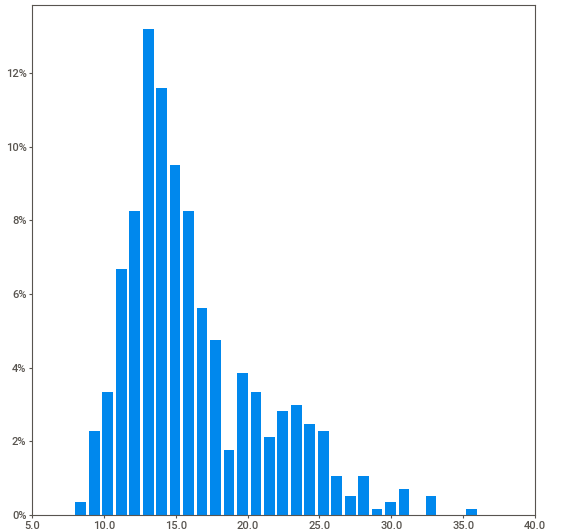
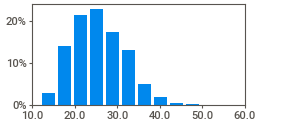
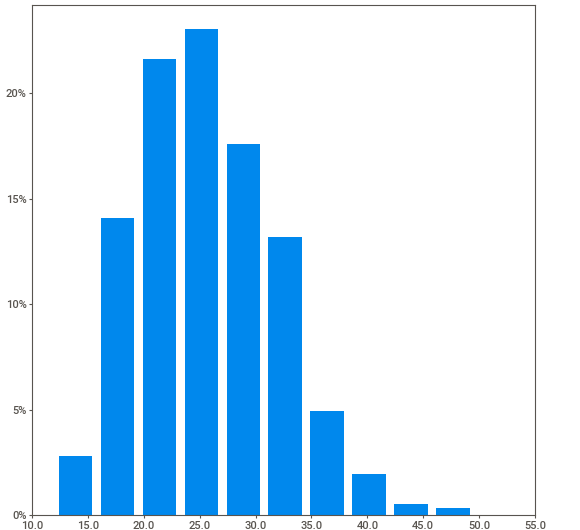
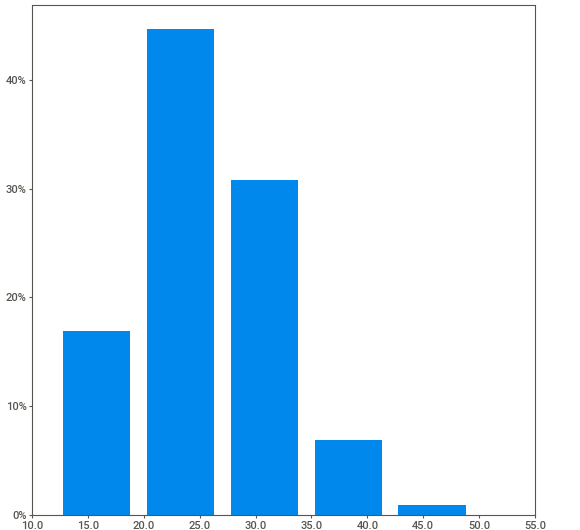
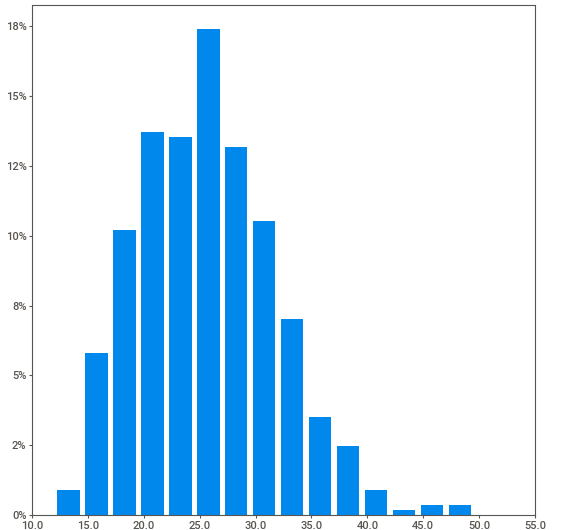
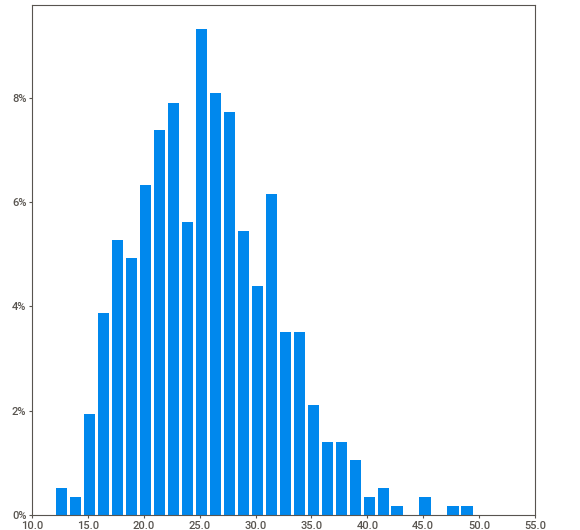
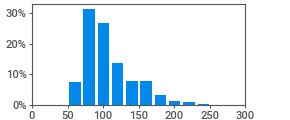
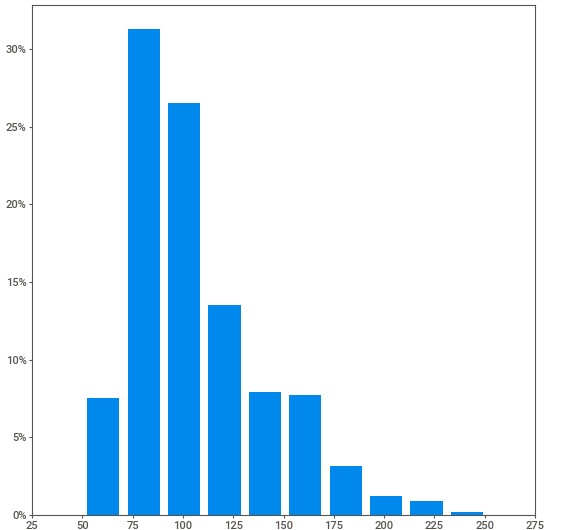
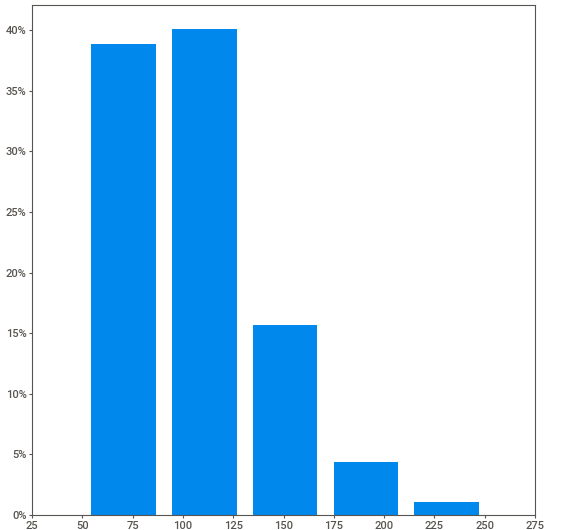
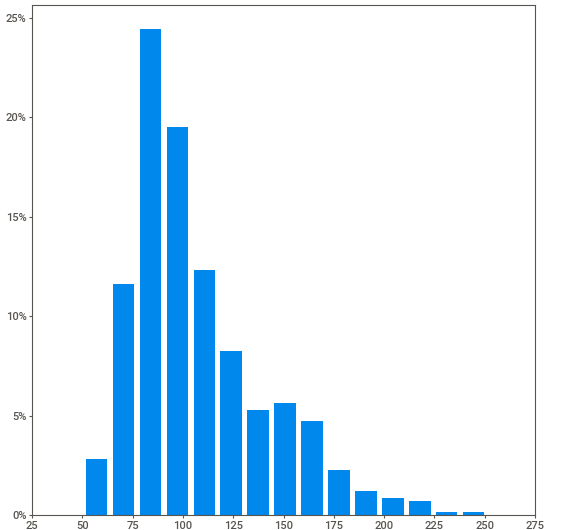
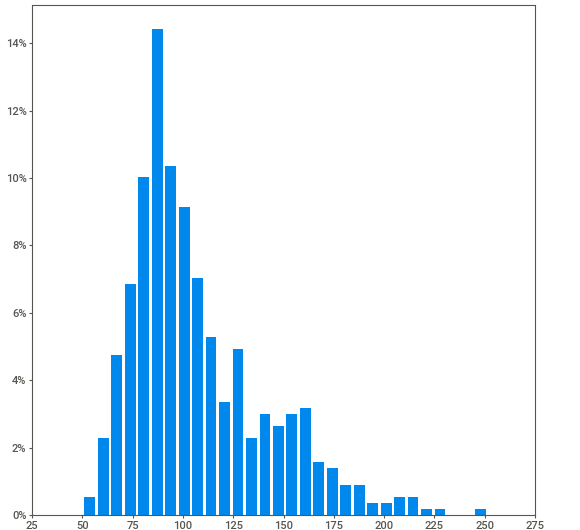
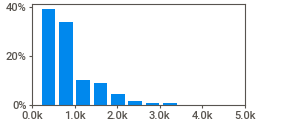
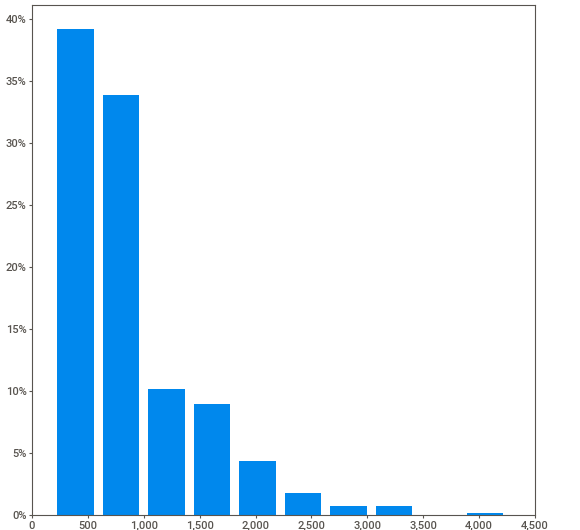
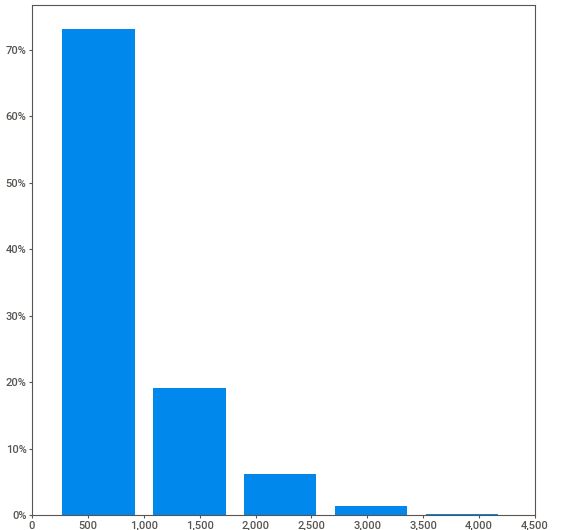
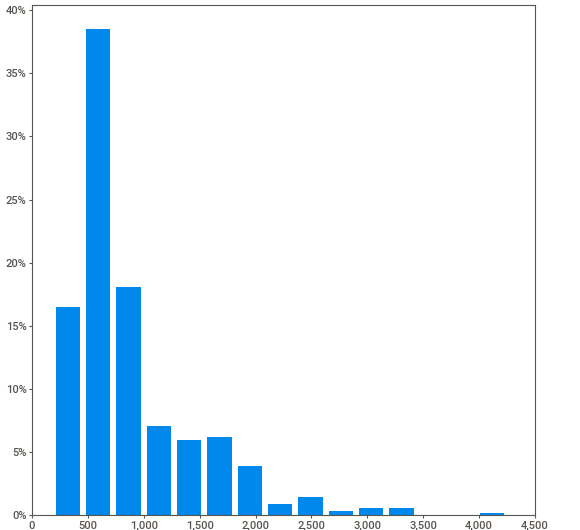
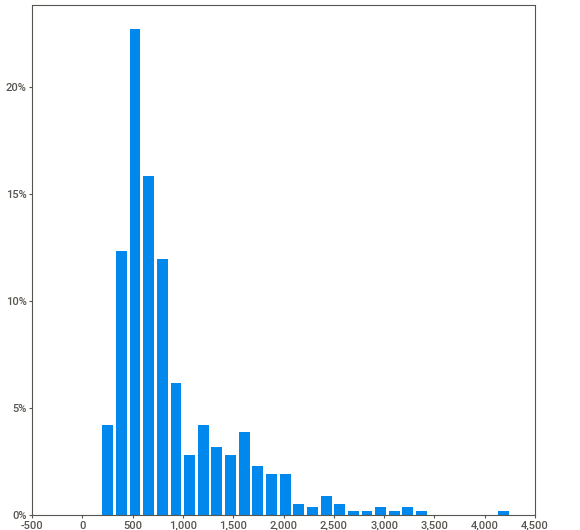
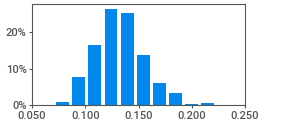
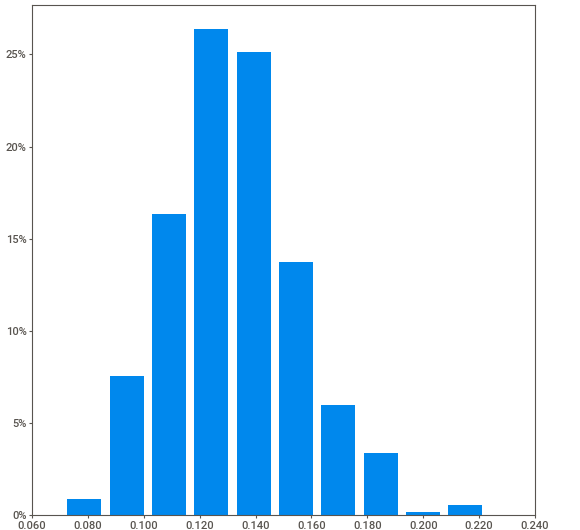
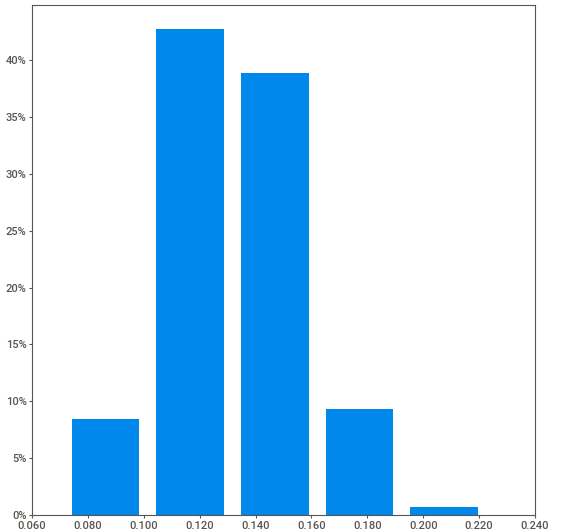
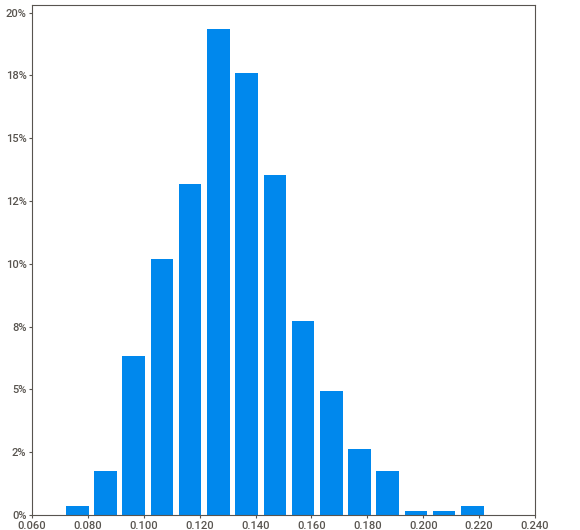
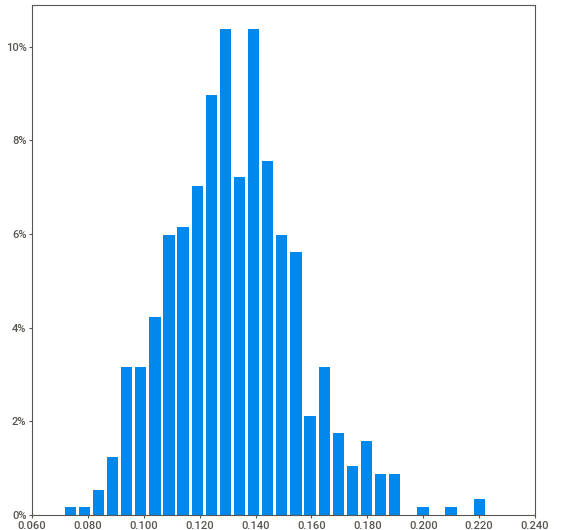
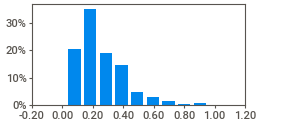
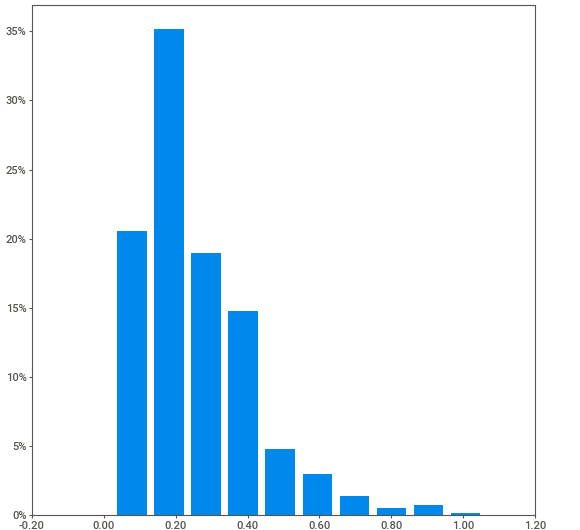
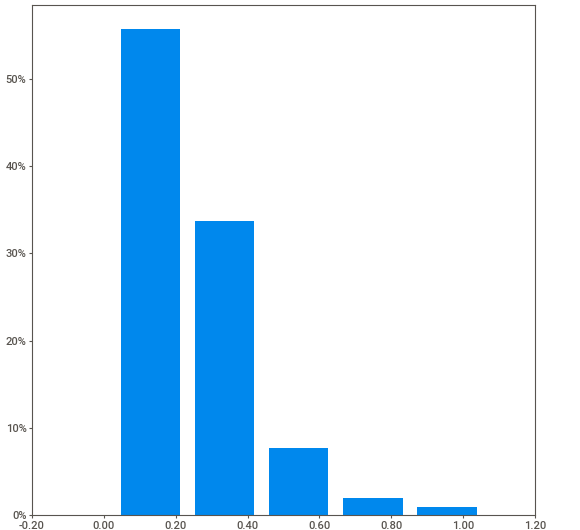
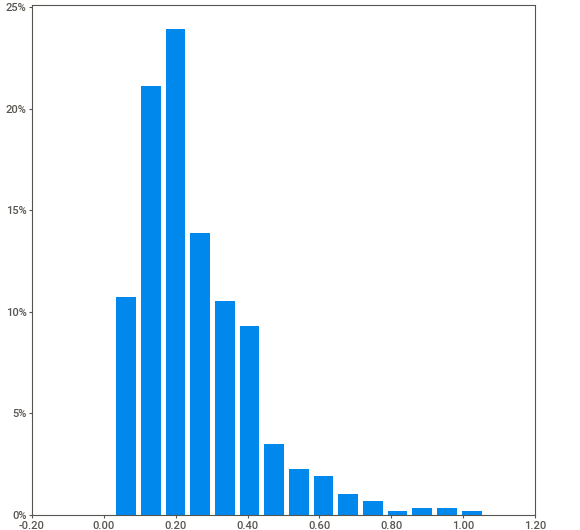
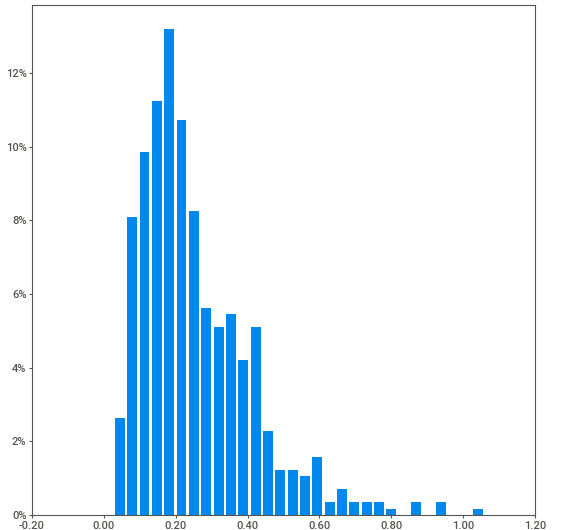
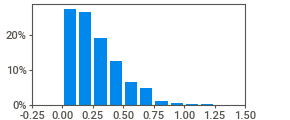
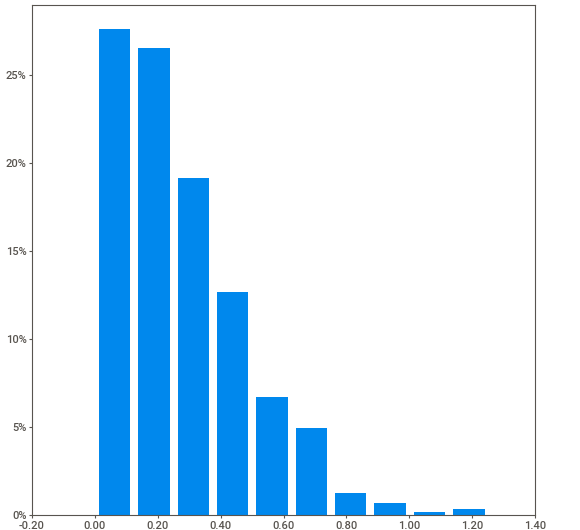
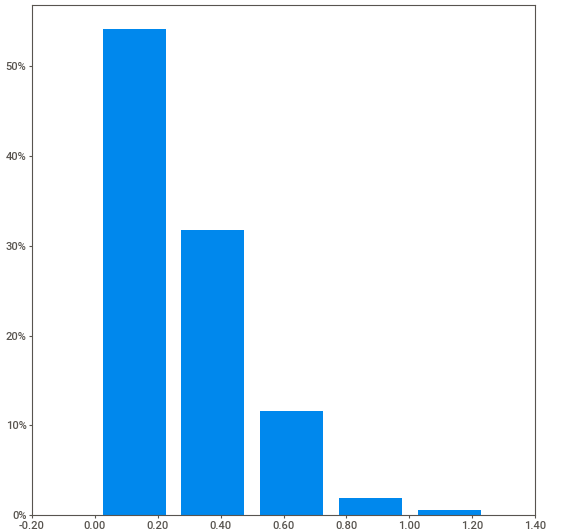
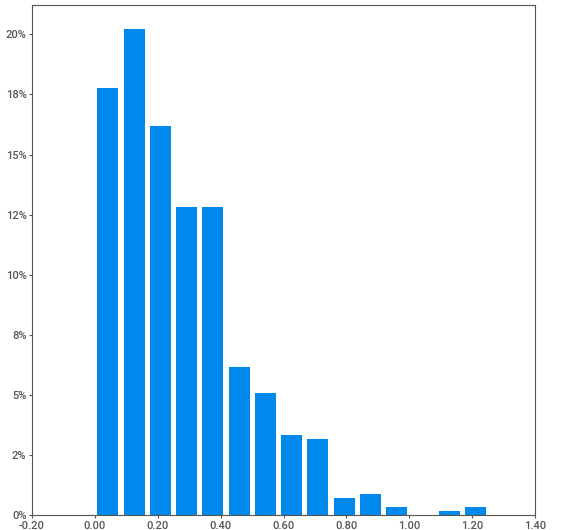
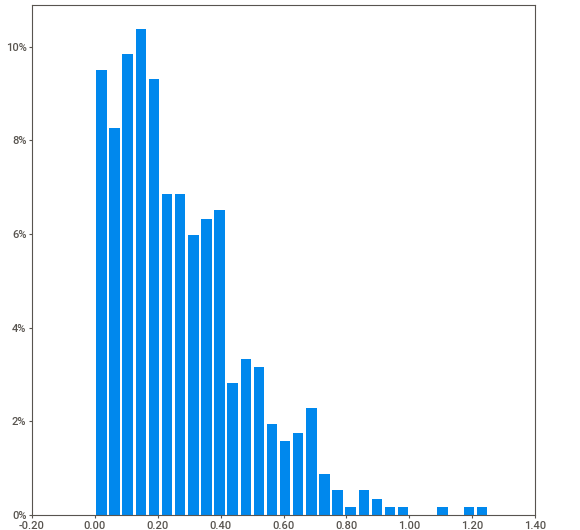
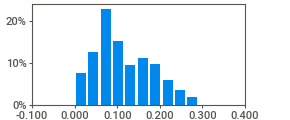
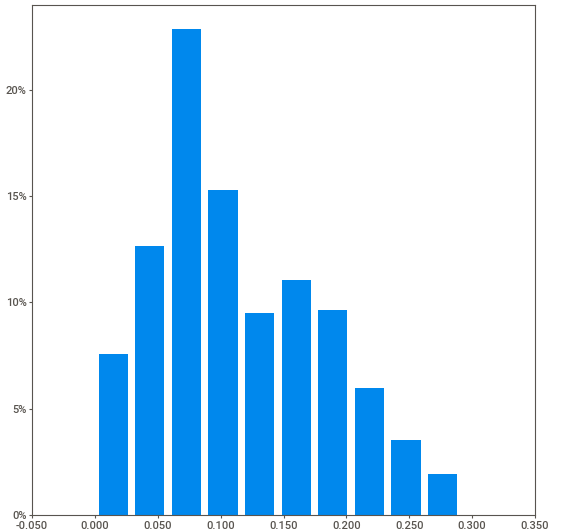
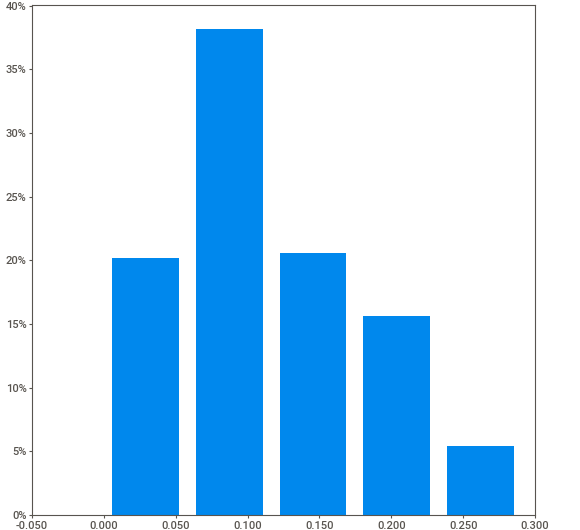
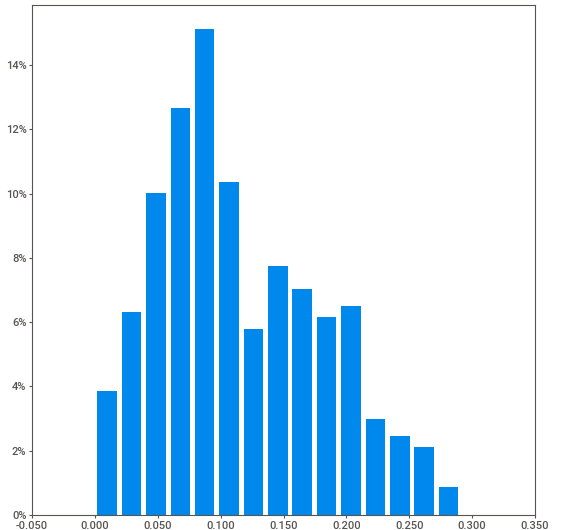
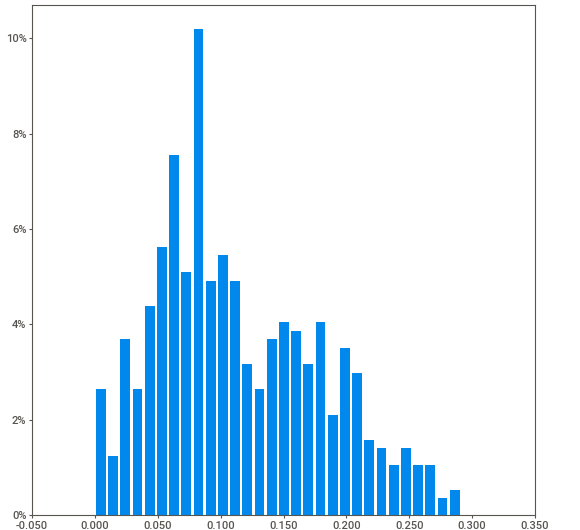
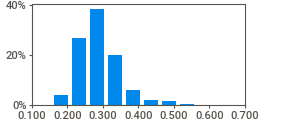
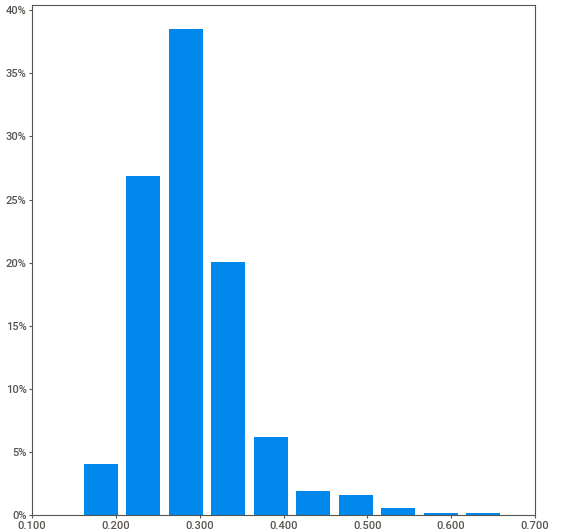
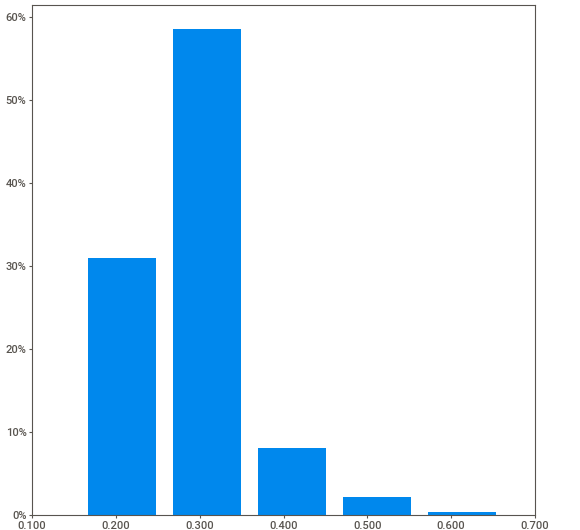
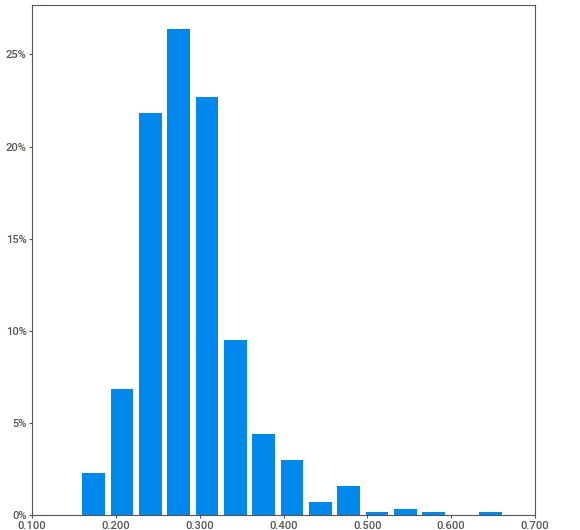
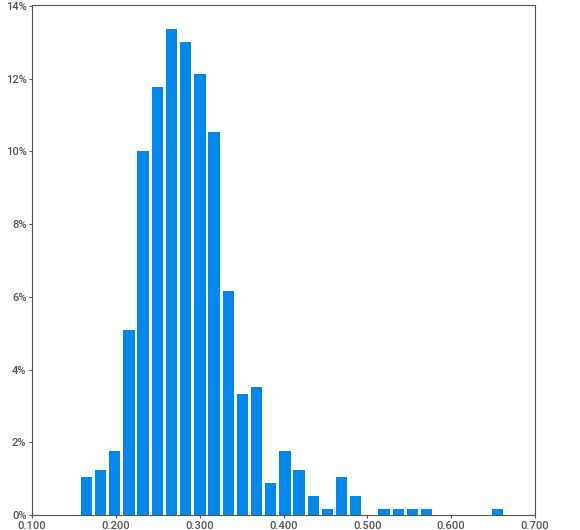
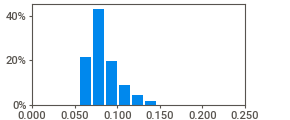
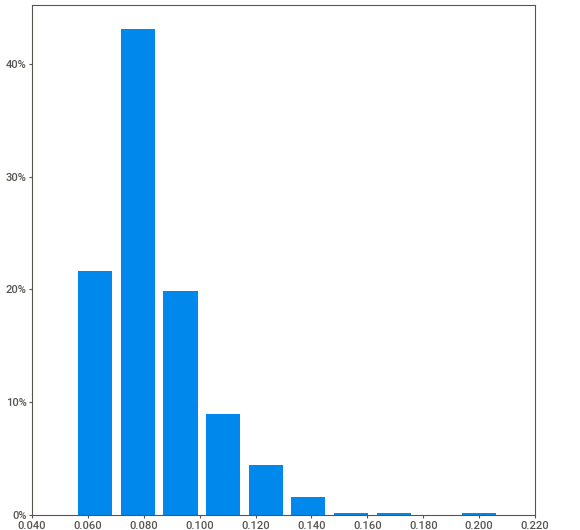
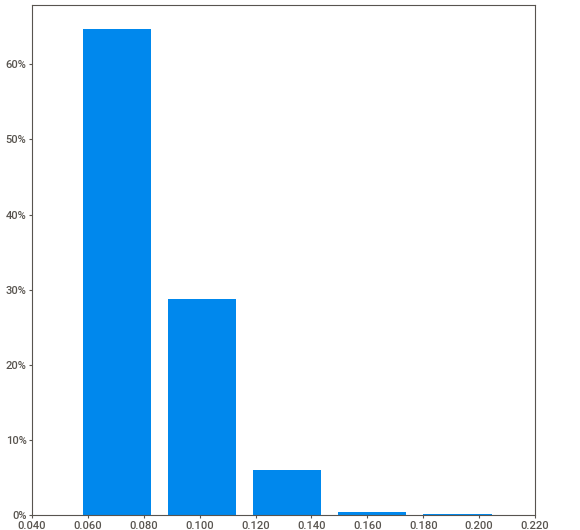
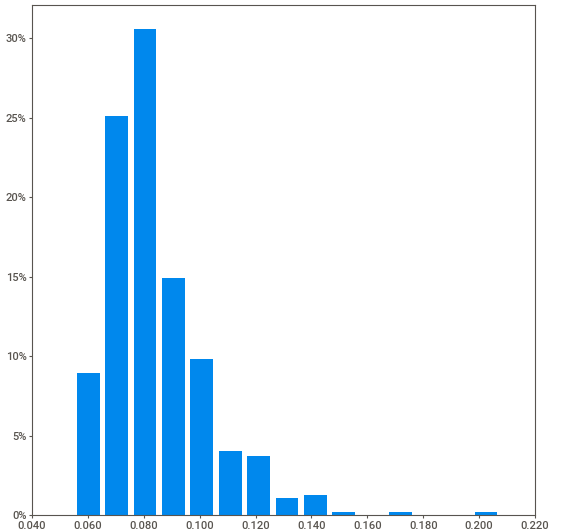
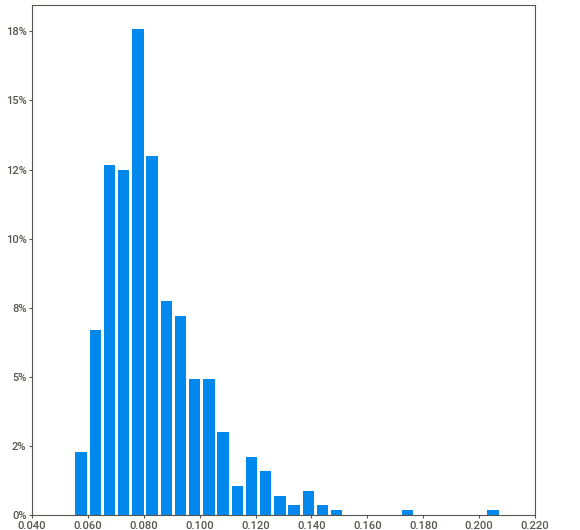
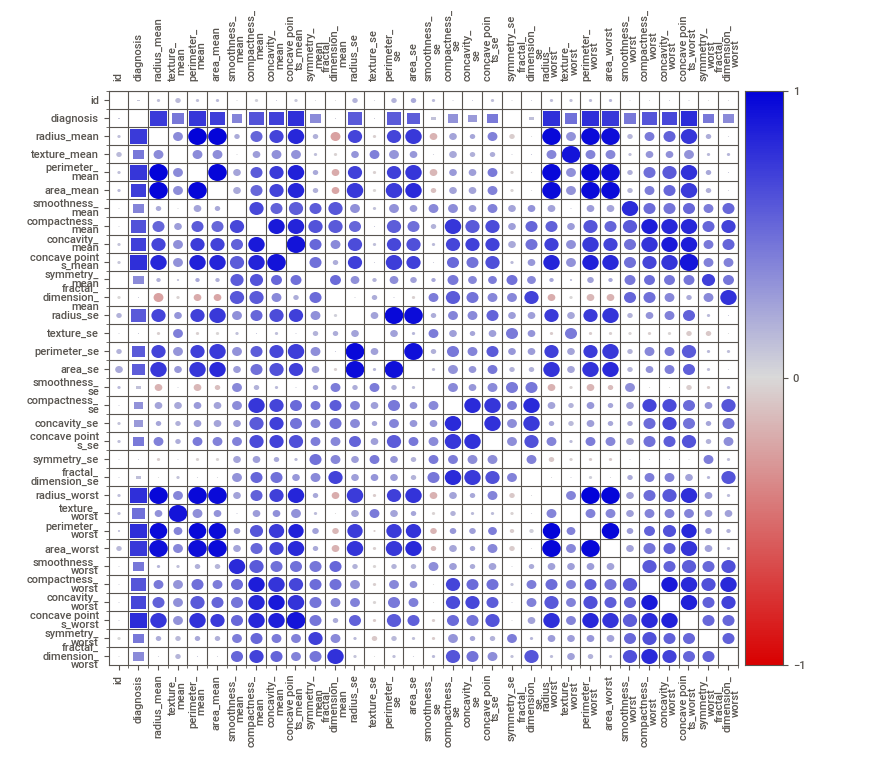
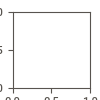

In [95]:

my_report = sv.analyze(data)
my_report.show_notebook()

**Analyzing Data**

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [97]:
data.describe()

id  radius_mean  ...  fractal_dimension_worst  Unnamed: 32
count  5.690000e+02   569.000000  ...               569.000000          0.0
mean   3.037183e+07    14.127292  ...                 0.083946          NaN
std    1.250206e+08     3.524049  ...                 0.018061          NaN
min    8.670000e+03     6.981000  ...                 0.055040          NaN
25%    8.692180e+05    11.700000  ...                 0.071460          NaN
50%    9.060240e+05    13.370000  ...                 0.080040          NaN
75%    8.813129e+06    15.780000  ...                 0.092080          NaN
max    9.113205e+08    28.110000  ...                 0.207500          NaN

[8 rows x 32 columns]

In [98]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [99]:

data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

**Preparing Data**

In [100]:
# Save labels in y
y = data["diagnosis"]

## Drop Columns and Correlation
We don't need pacient "id", "diagnosis" is our labels and "Unnamed: 32" have only NaNs. Let exclude this tree columns. **bold text**

In [101]:
# Drop columns
X = data.drop(["id", "diagnosis", "Unnamed: 32"], axis=1)

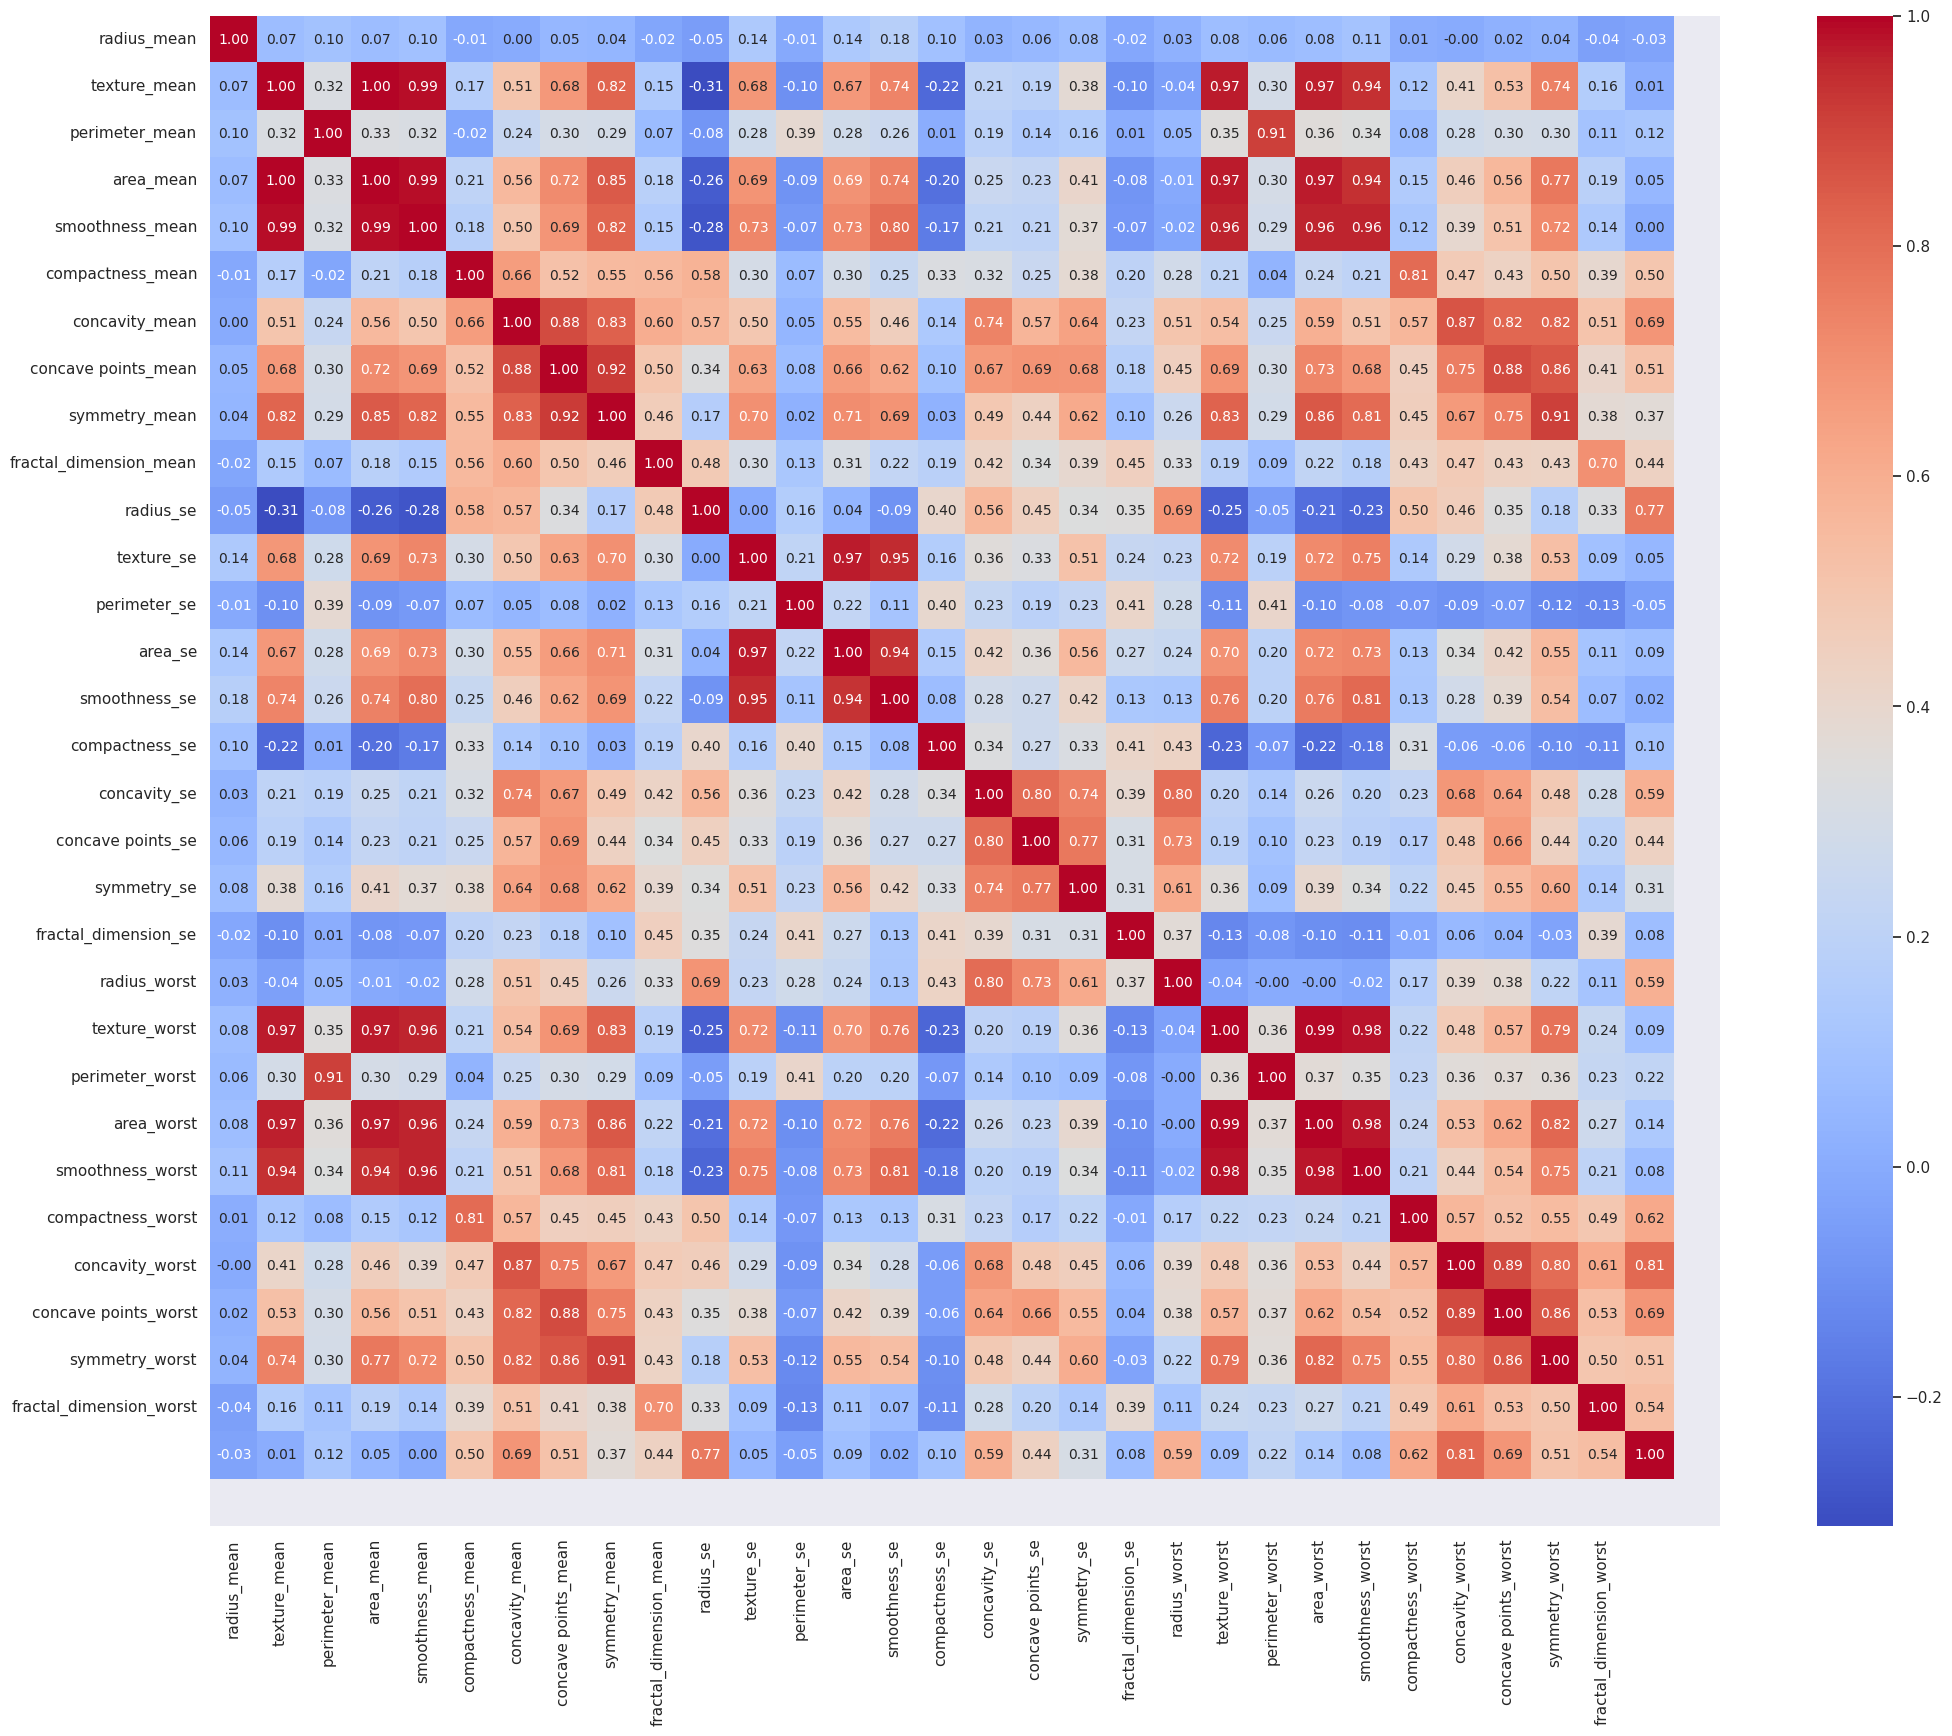

In [102]:
# Plot a Correlation chart
corr = data.corr() # .corr is used for find corelation
#plt.figure(figsize=(20,15))
sns.set(rc={'figure.figsize':(25,20)})
# plot a heatmap
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= X.columns, yticklabels= X.columns,
           cmap= 'coolwarm') 

There is some stronge correlations: *
Features like (something)_mean, (something)_se, (something)_worst, have a natural correlation because all these are generated using same data,* for example: to generate radius_mean, radius_se and radius_worst, radius mesuraments is used.*

---

**bold text**

Almost perfectly linear patterns between the radius, perimeter, and area attributes are hinting at the presence of **multicollinearity** between these variables. Another set of variables that possibly imply **multicollinearity** are the concavity, concave_points, and compactness.

# **Positive Correlation:**

Radius, Perimeter and Area have stronge positive correlation




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


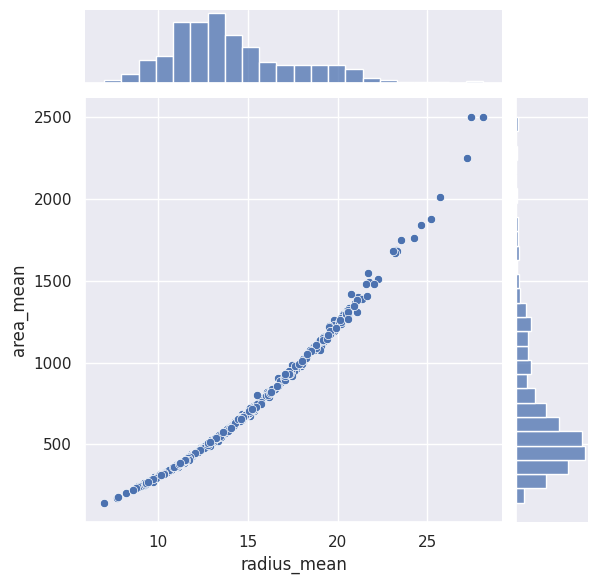

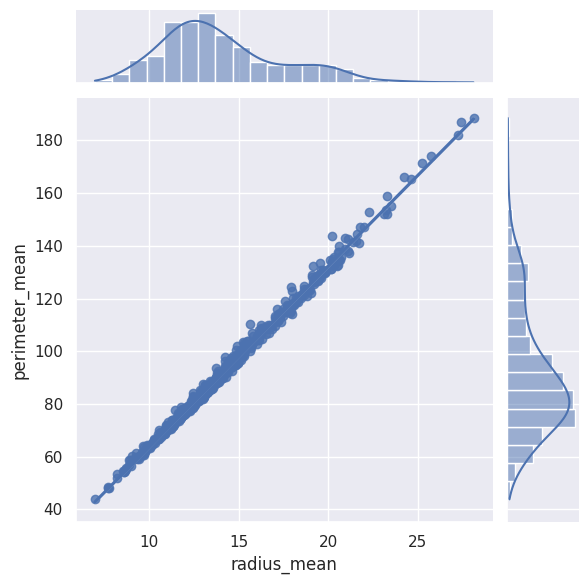

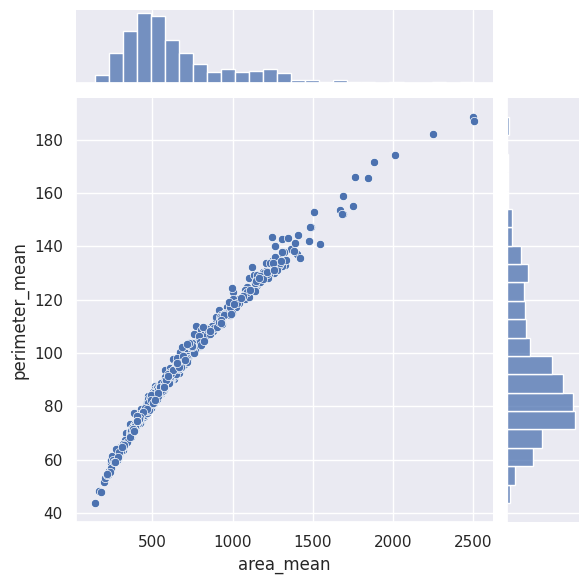

In [103]:
# Plot correlation between 2 features and distribution
sns.jointplot(X.loc[:,'radius_mean'], 
              X.loc[:,'area_mean'], 
              kind="scatter")

sns.jointplot(X.loc[:,'radius_mean'], 
              X.loc[:,'perimeter_mean'], 
              kind="reg")

sns.jointplot(X.loc[:,'area_mean'], 
              X.loc[:,'perimeter_mean'], 
              kind="scatter")

Radius have a strong positive correlation with Concave Points

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


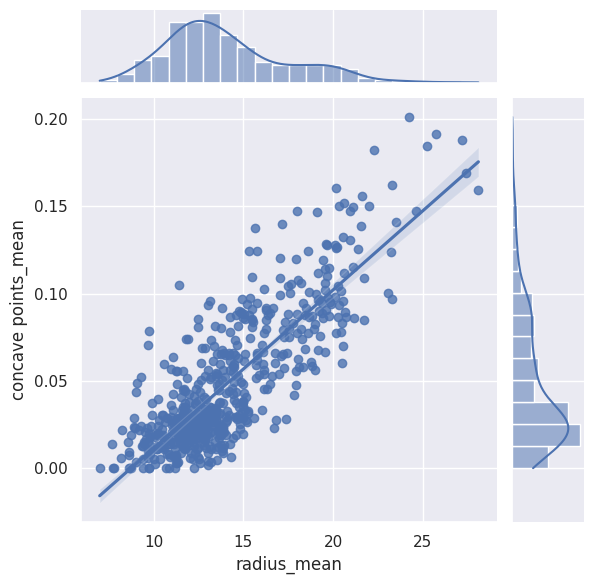

In [104]:
# Plot correlation between 2 features and distribution
sns.jointplot(X.loc[:,'radius_mean'], 
              X.loc[:,'concave points_mean'], 
              kind="reg")


Compacteness, Concavity and Concave Points have strong positive correlation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


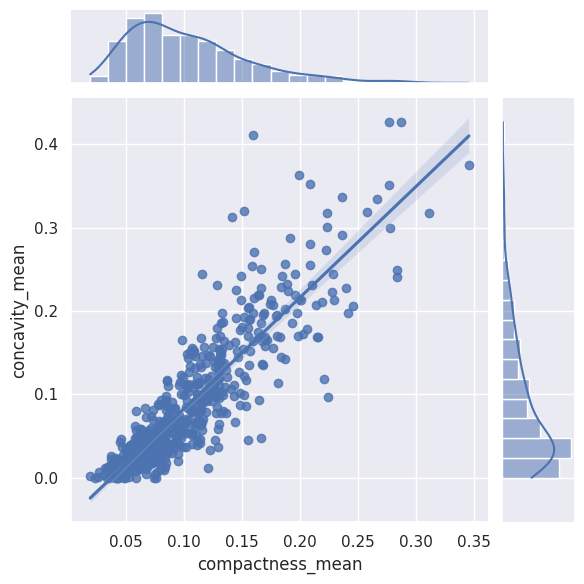

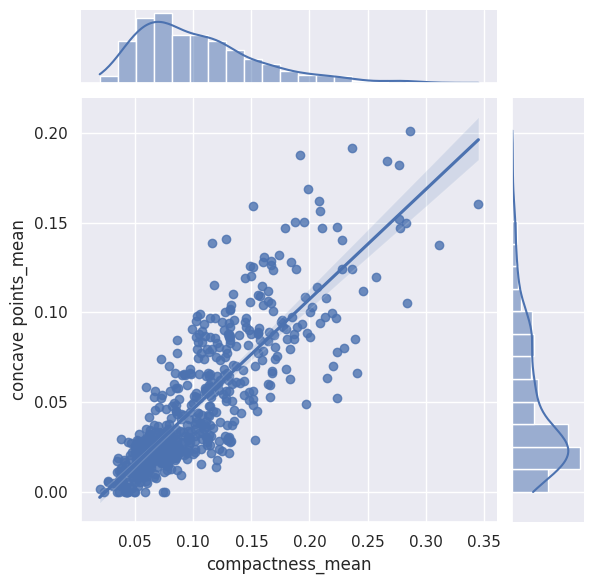

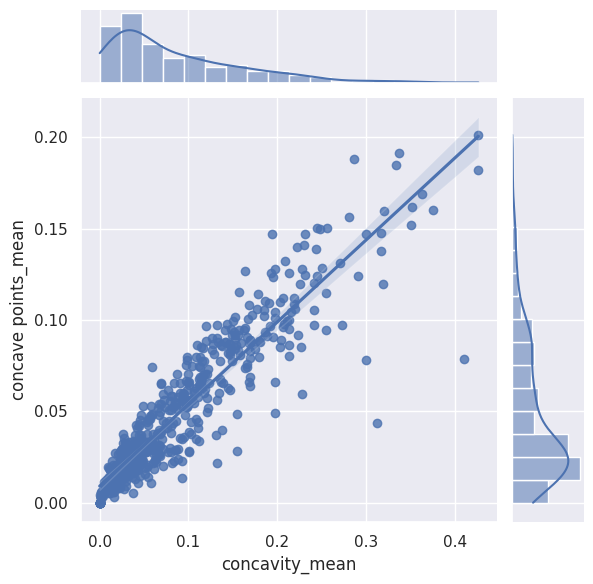

In [105]:
# Plot correlation between 2 features and distribution
sns.jointplot(X.loc[:,'compactness_mean'], 
              X.loc[:,'concavity_mean'], 
              kind="reg")

sns.jointplot(X.loc[:,'compactness_mean'], 
              X.loc[:,'concave points_mean'], 
              kind="reg")


sns.jointplot(X.loc[:,'concavity_mean'], 
              X.loc[:,'concave points_mean'], 
              kind="reg")


# **Negative Correlation**

Fractal Dimention have some negative correlation with Radius, Perimeter and Area

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


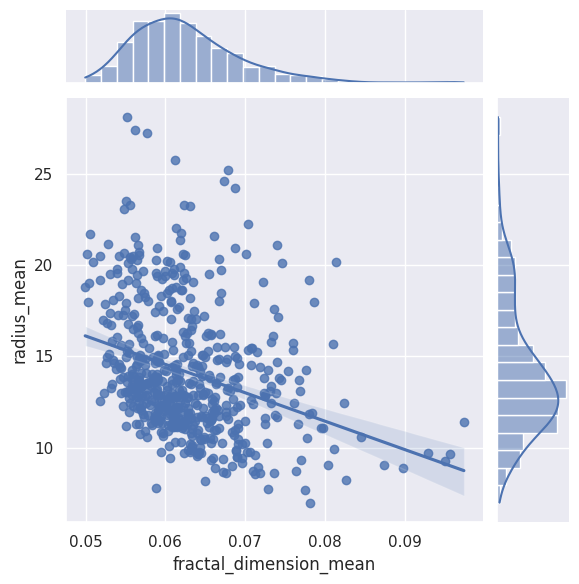

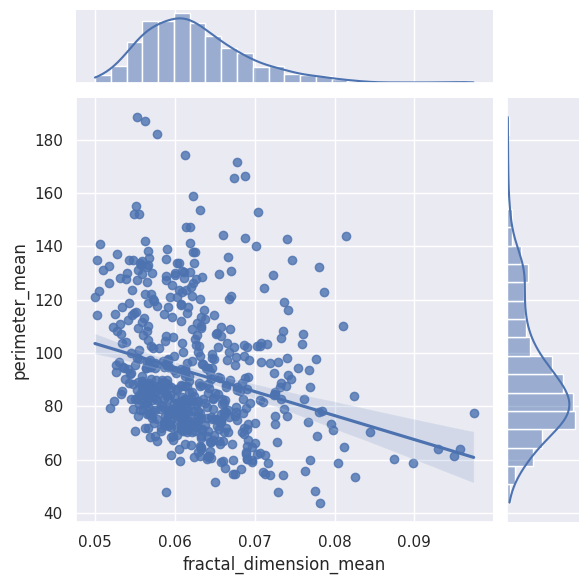

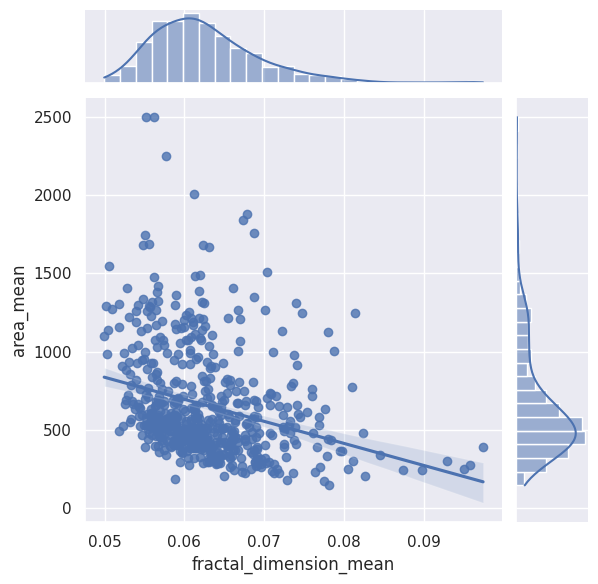

In [106]:
# Plot correlation between 2 features and distribution
sns.jointplot(X.loc[:,'fractal_dimension_mean'], 
              X.loc[:,'radius_mean'], 
              kind="reg")

sns.jointplot(X.loc[:,'fractal_dimension_mean'], 
              X.loc[:,'perimeter_mean'], 
              kind="reg")

sns.jointplot(X.loc[:,'fractal_dimension_mean'], 
              X.loc[:,'area_mean'], 
              kind="reg")

# **Verifing if Dataset is Balanced**

Data ins't balenced, there is more case of benigns tumors that malignant. Later we'll use methods to balance data and analyze if results get better.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


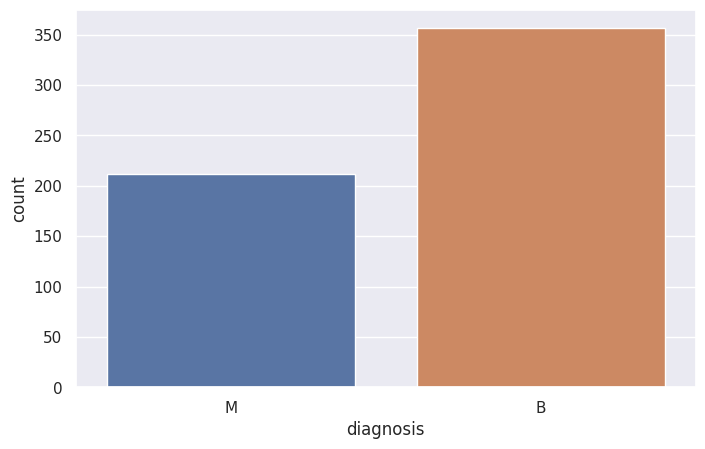

In [107]:
# Plot a countplot
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(y) 

In [108]:
df = pd.read_csv("https://raw.githubusercontent.com/Vinsocf/emotions/main/Wisconsin-bc-data.csv")

# **Correlation with Diagnosis:**
**Correlation of Mean Features with Diagnosis: **

In [110]:
x=df.drop(['Unnamed: 32','id','diagnosis'],axis=1)

In [111]:
y=df['diagnosis']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Number of Benign:  357
Number of Malignant :  212


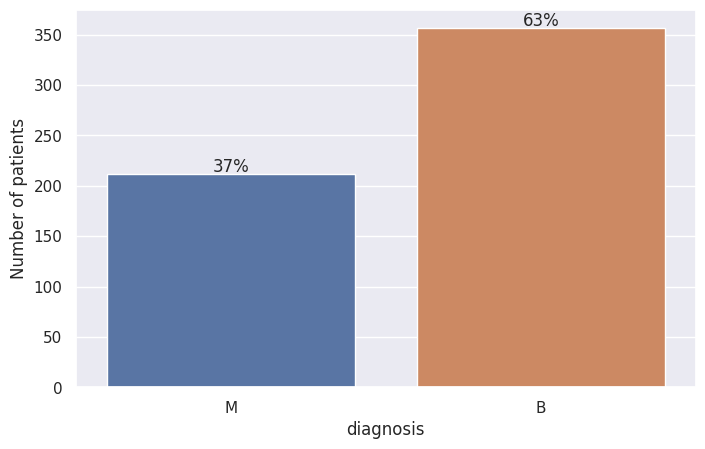

In [112]:
ax = sns.countplot(y,label="Count")       
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)
ax.set_ylabel('Number of patients')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    ax.text(left.get_x() + left.get_width()/2., height_l + 2, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 2, '{0:.0%}'.format(height_r/total), ha="center")

# **Mean Features vs Diagnosis:**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 46.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.7% of the points cannot be placed; y

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

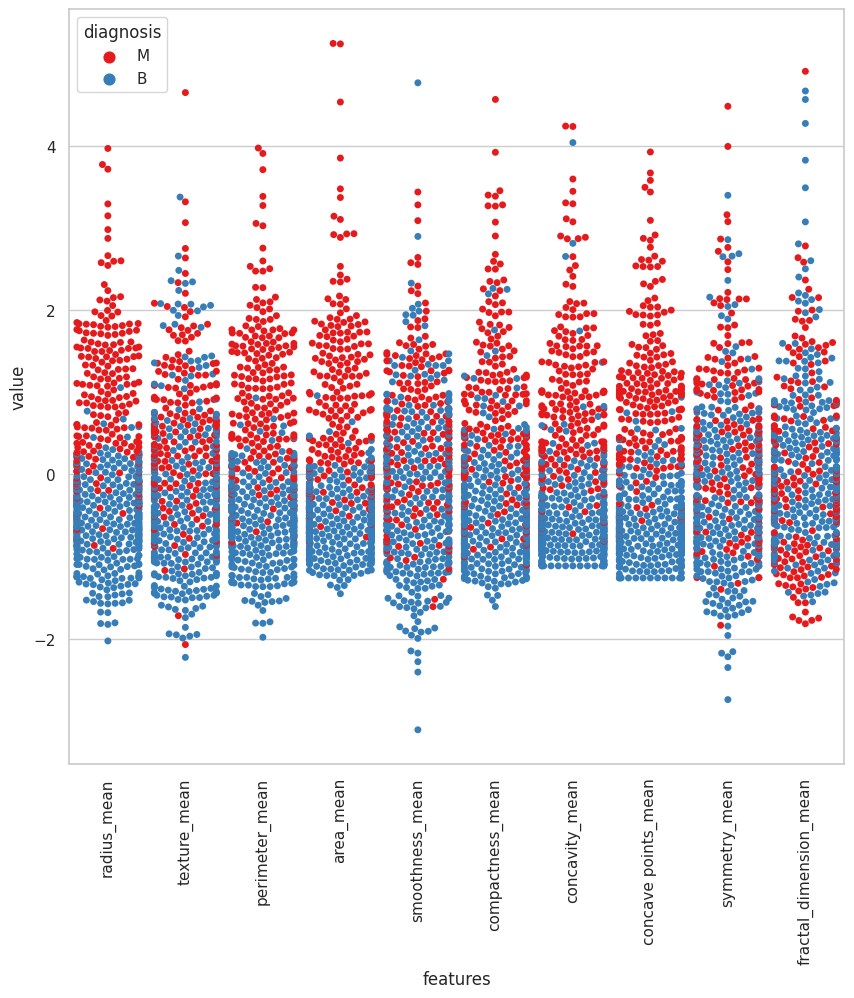

In [115]:
import time
sns.set(style="whitegrid", palette="Set1")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())             
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

**Observations:**

fractal_dimension_mean least correlated with the target variable.

All other mean features have a significant correlation with the target variable.

# **Squared Error Features vs Diagnosis:**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 65.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 61.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 62.6% of the points cannot be placed; y

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

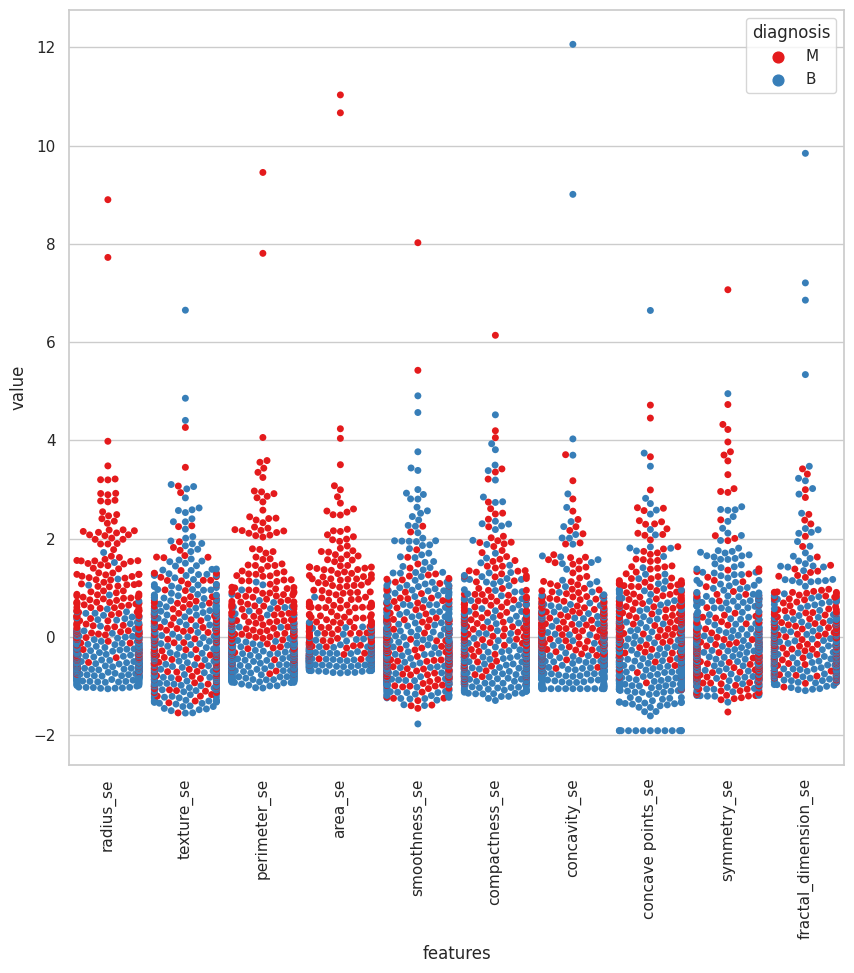

In [116]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

**Observations:**

texture_se, smoothness_se, symmetry_se, and fractal_dimension_se are least correlated with the target variable.

All other squared error features have a significant correlation with the target variable.

# **Worst Features vs Diagnosis:**


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 47.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 45.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 48.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 54.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 43.9% of the points cannot be placed; y

swarm plot time:  104.82020425796509  s


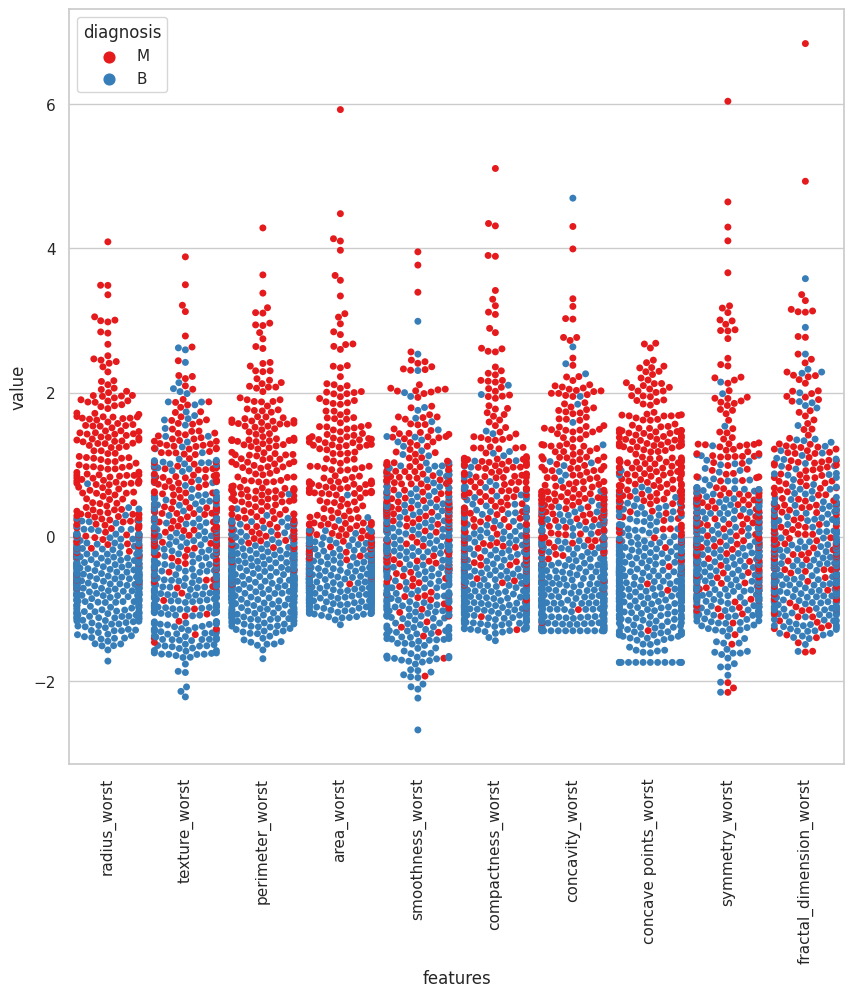

In [118]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")


**Observation:**
All worst features have a significant correlation with the target variable.